# FINAL ASSIGNMENT PROJECT - TEAM 3

# Uber and Lyft - Rideshare Analysis & Price Prediction

This final project includes 5 sections as below:

- Section 1: Project Introduction & Objectives
- Section 2: Import Libraries and Understanding Dataset
- Section 3: Exploratory Data Analysis
- Section 4: Data Analyzing & Visualizing
- Section 5: Data Preprocessing
- Section 6: Regression Model With PySpark
- Section 7: Communicate The Insights & Results


** Please note that all charts presented in the PowerPoint file were created from this IPython Notebook.

** Prepared By TEAM 3:
- Nguyễn Huỳnh Ngọc Hân (Jack Nguyễn)
- Trần Minh Kiệt
- Vũ Mạnh Trung Hải


*** The source of the main dataset "Uber and Lyft Dataset Boston, MA" for this project is referenced in the following link: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data


#1 - Project Introduction & Objectives:

**1. Introduction**

The rapid development of ride-hailing services
has transformed urban transportation,
making it more accessible, convenient, and cost-effective.

However, pricing in ride-hailing services is highly dynamic, influenced by various factors such as demand, traffic conditions, weather, and service availability, etc.

In this project, we aim to analyze and figure out key factors that affect ride-hailing fares and build a predictive model to estimate ride prices based on these influencing variables.


**2. Questions Hypotheses**

- Q1: Ride fares increase during peak hours due to higher demand and surge pricing?
- Q2: Weather conditions, such as rain or snow, lead to higher fares as supply decreases and demand rises?
- Q3: Fluctuations in temperature affect price fluctuations, due to changing demand?
- Q4: Longer travel distances contribute to increased ride prices?
- Q5: Pickup and drop-off locations influence ride pricing?
- Q6: How to predict estimated ride prices based on these influencing variables?

**3. Dataset Overview**

For this study, we use the Uber and Lyft Dataset (Boston, MA), a very popular and beginner-friendly dataset about ride-hailing data.
This dataset includes various attributes such as:
ride price, ride distance, car type, surge pricing multipliers, time of day, temperature information and weather conditions.

**>>> Dataset Strengths:**
- ✅ Large and diverse dataset covering variety factors related ride-hailing.
- ✅ Includes both Uber and Lyft, enabling comparative analysis.
- ✅ Contains weather & temperature data, allowing us to analyze its impact on ride fares.

**>>> Dataset Limitations:**
- ❌ Limited to a single geographical area (Boston, MA) and the data collected in only 2 months, which may affect generalizability.
- ❌ No real-time traffic data, which could be a crucial factor in price variations.
- ❌ Does not include rider demographics or behavioral patterns, limiting user-segmentation analysis.

**4. Project Objectives**

- Identify key factors influencing ride-hailing prices.
- Build and evaluate a machine learning model to predict ride fares.
- Provide data-driven insights for both ride-hailing companies and consumers.

This project will contribute to a better understanding of pricing dynamics in the ride-hailing industry, supporting more informed decision-making for both service providers and users.

#2 - Import Libraries and Understanding Dataset

##2.1 - Import Libraries & Dataset

In [91]:
# Install necessary libraries
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark scikit-learn openpyxl pandas matplotlib seaborn findspark

# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
# !pip install pyspark
!tar xf spark-3.5.0-bin-hadoop3.tgz
# import pyspark
# print(pyspark.__version__)

# Initialize findspark
import findspark
findspark.init()

# Initialize PySpark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("UberLyftPricing").getOrCreate()

# Import necessary PySpark libraries
from pyspark.sql.functions import col, when, count, avg
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

print("PySpark setup is complete!")


PySpark setup is complete!


In [92]:
# Mount Google Drive in Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# Create Spark dataframe:

file_path = '/content/drive/MyDrive/Aptech Project HK2/rideshare_kaggle.csv'

spark_df = spark.read.csv(file_path, header=True, inferSchema=True)
spark_df.show(5)


+--------------------+----------------+----+---+-----+-------------------+----------------+----------------+-------------+--------+------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|       timestamp|hour|day|month|           datetime|        timezone|          source|  destination|cab_type|  product_id

##2.2 - Understanding Dataset

**Definition of dataset columns as below - Total 57 columns:**

- id: unique ride ID.
- timestamp: timestamp of the ride request.
- hour: hour of the ride request.
- day: day of the ride request.
- month: month of the ride request.
- datetime: date and time of the ride request.
- timezone: timezone of the ride request.
- source: starting location of the ride.
- destination: ending location of the ride.
- cab_type: ride-hailing company (Uber/Lyft).
- product_id: unique ride product identifier.
- name: type of ride (UberX, Lyft XL, etc.)
- price: ride fare in USD.
- distance: Trip distance in miles.
- surge_multiplier: surge pricing multiplier.
---
- latitude: coordinates of source/destination.
- longitude: coordinates of source/destination.
- temperature: temperature in Fahrenheit.
- apparentTemperature: feels-like temperature.
- short_summary: weather condition (e.g., Clear, Rainy).
- long_summary: detailed weather description.
---
- precipIntensity: rainfall intensity	(cường độ mưa).
- precipProbability: probability of precipitation (xác xuất xảy ra mưa).
- humidity: air humidity percentage (% độ ẩm).
- windSpeed: wind speed in mph (tốc độ gió tính bằng dặm/giờ).
- windGust: wind gust speed (tốc độ gió giật).
- windGustTime: wind gust timestamp (thời điểm có gió giật).
---
- visibility: Visibility in miles	(tầm nhìn tính bằng dặm).
- temperatureHigh
- temperatureHighTime
- temperatureLow
- temperatureLowTime
- apparentTemperatureHigh
- apparentTemperatureHighTime
- apparentTemperatureLow
- apparentTemperatureLowTime
---
- icon
- dewPoint: điểm sương
- pressure: áp suất
- windBearing: hướng gió
---
- cloudCover: Cloud coverage percentage	(độ che phủ của mây).
- uvIndex: UV radiation index	(chỉ số bức xạ UV).
- visibility.1
---
- ozone
- sunriseTime
- sunsetTime
- moonPhase: Phase of the moon (0 = New Moon, 1 = Full Moon)
---
- precipIntensityMax
- uvIndexTime
- temperatureMin
- temperatureMinTime
- temperatureMax
- temperatureMaxTime
- apparentTemperatureMin
- apparentTemperatureMinTime
- apparentTemperatureMax
- apparentTemperatureMaxTime

In [94]:
# Show the schema (data types of columns)
spark_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |

In [95]:
# Number of rows
num_rows = spark_df.count()

# Number of columns
num_columns = len(spark_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 693071
Number of columns: 57


#3 - Exploratory Data Analysis

##3.1 - Data Cleaning - Data Type Check and Convert:

In [96]:
# Display the schema:
spark_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |

In [97]:
# Remove rows where "price" column contains "NA"
spark_df = spark_df.filter(spark_df.price != "NA")

# Verify if "NA" is removed
spark_df.select("price").distinct().show()


+-----+
|price|
+-----+
|  8.5|
| 20.5|
| 47.5|
|18.35|
| 38.5|
|    7|
| 26.5|
|   51|
|   15|
|   54|
| 64.5|
|   11|
| 22.5|
|   29|
|   42|
| 53.5|
|   87|
|    3|
| 54.5|
|   30|
+-----+
only showing top 20 rows



In [98]:
# Convert data types of columns: "timestamp" and "price":

from pyspark.sql.functions import col

spark_df = spark_df.withColumn("timestamp", col("timestamp").cast("timestamp")) \
                   .withColumn("price", col("price").cast("double")) \
                   .withColumn("windBearing", col("windBearing").cast("double"))

# Show the schema after type conversion
spark_df.printSchema()



root
 |-- id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)

##3.2 - Data Cleaning - Number of unique values of each string columns:

In [99]:
# Loop through each string column (excluding 'id') and show the unique values along with the count
string_columns = [col for col, dtype in spark_df.dtypes if dtype == 'string' and col != 'id']

for col_name in string_columns:
    print(f"Column: {col_name}")

    # Get the unique values
    unique_values = spark_df.select(col_name).distinct().collect()

    # Print the unique values
    for value in unique_values:
        print(value[0])

    # Count the unique values
    unique_count = len(unique_values)
    print(f"Unique values count: {unique_count}\n")
    print("---------------------------------------")


Column: timezone
America/New_York
Unique values count: 1

---------------------------------------
Column: source
Financial District
Northeastern University
North End
Boston University
North Station
Back Bay
Theatre District
South Station
Fenway
Haymarket Square
West End
Beacon Hill
Unique values count: 12

---------------------------------------
Column: destination
Financial District
Northeastern University
North End
Boston University
North Station
Back Bay
Theatre District
South Station
Fenway
Haymarket Square
West End
Beacon Hill
Unique values count: 12

---------------------------------------
Column: cab_type
Lyft
Uber
Unique values count: 2

---------------------------------------
Column: product_id
lyft_luxsuv
9a0e7b09-b92b-4c41-9779-2ad22b4d779d
6f72dfc5-27f1-42e8-84db-ccc7a75f6969
6c84fd89-3f11-4782-9b50-97c468b19529
lyft
997acbb5-e102-41e1-b155-9df7de0a73f2
lyft_plus
lyft_line
6d318bcc-22a3-4af6-bddd-b409bfce1546
lyft_lux
lyft_premier
55c66225-fbe7-4fd5-9072-eab1ece5e23e
Unique

##3.3 - Data Cleaning - Handling Duplications:

In [100]:
# Count the number of duplicate rows
num_duplicates = spark_df.count() - spark_df.distinct().count()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [101]:
# Number of rows
num_rows = spark_df.count()

# Number of columns
num_columns = len(spark_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

spark_df.show(5)

Number of rows: 637976
Number of columns: 57
+--------------------+--------------------+----+---+-----+-------------------+----------------+----------------+-------------+--------+------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|           timestamp|hour|day|month|           datetime|        timezone

In [102]:
spark_df.show(5)

+--------------------+--------------------+----+---+-----+-------------------+----------------+----------------+-------------+--------+------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|           timestamp|hour|day|month|           datetime|        timezone|          source|  destination|cab_type|  pr

In [103]:
# Remove "visibility.1" column as the same with "visibility" column:

# Drop the "visibility.1" column
spark_df = spark_df.drop("visibility.1")

# Verify if the column is removed
spark_df.printSchema()


root
 |-- id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)

##3.4 - Data Cleaning - Handling Missing Values:


In [104]:
from pyspark.sql.functions import col, sum

# Count missing (null) values in each column
missing_values = spark_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_df.columns])

# Show the result
missing_values.show()


+---+---------+----+---+-----+--------+--------+------+-----------+--------+----------+----+-----+--------+----------------+--------+---------+-----------+-------------------+-------------+------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+----+--------+--------+-----------+----------+-------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
| id|timestamp|hour|day|month|datetime|timezone|source|destination|cab_type|product_id|name|price|distance|surge_multiplier|latitude|longitude|temperature|apparentTemperature|short_summary|long_summary|precipIntensity|precipProbability|humidity|wi

In [105]:
# Number of rows
num_rows = spark_df.count()

# Number of columns
num_columns = len(spark_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

spark_df.show(5)

Number of rows: 637976
Number of columns: 56
+--------------------+--------------------+----+---+-----+-------------------+----------------+----------------+-------------+--------+------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|           timestamp|hour|day|month|           datetime|        timezone|          so

#4 - Visualization

##4.1 - Time & Price Analysis Overall - Uber vs. Lyft

### 4.1.1 - Time & price analysis - OVERALL:

In [106]:
from pyspark.sql.functions import count, avg

# Count number of rides per month
month_analysis = spark_df.groupBy("month").agg(count("*").alias("ride_count"), avg("price").alias("avg_price"))
month_analysis.orderBy("month").show()


+-----+----------+------------------+
|month|ride_count|         avg_price|
+-----+----------+------------------+
|   11|    263771|16.534980532355718|
|   12|    374205|16.552276506193127|
+-----+----------+------------------+



In [107]:
# Count number of rides per day
day_analysis = spark_df.groupBy("day").agg(count("*").alias("ride_count"), avg("price").alias("avg_price"))
day_analysis.orderBy("day").show()


+---+----------+------------------+
|day|ride_count|         avg_price|
+---+----------+------------------+
|  1|     41680| 16.57244481765835|
|  2|     41298|16.548694852050946|
|  3|     41323| 16.46480168429204|
|  4|     11627|16.653521974714028|
|  9|      1529|16.795945062132112|
| 10|      2534| 16.42028413575375|
| 13|     35496|16.589641931485236|
| 14|     41344|16.559872049148606|
| 15|     41332|16.560643085260814|
| 16|     41359| 16.58670422398994|
| 17|     41354| 16.49750568264255|
| 18|     33329| 16.56912898676828|
| 26|     29028|16.532864820173625|
| 27|     70135| 16.59011620446282|
| 28|     67842| 16.52618879160402|
| 29|     55222|16.564557603853537|
| 30|     41544| 16.41842022915463|
+---+----------+------------------+



In [108]:
# Count number of rides per hour
hour_analysis = spark_df.groupBy("hour").agg(count("*").alias("ride_count"), avg("price").alias("avg_price"))
hour_analysis.orderBy("hour").show()


+----+----------+------------------+
|hour|ride_count|         avg_price|
+----+----------+------------------+
|   0|     29872|16.574769014461705|
|   1|     26310|16.513778031166858|
|   2|     26323|16.561803365877747|
|   3|     25530|16.539717978848415|
|   4|     26125| 16.57931100478469|
|   5|     22995|16.537216786257883|
|   6|     25147|16.519326360997336|
|   7|     22930|16.491626689925862|
|   8|     22337|16.603326319559475|
|   9|     26673| 16.51257826266262|
|  10|     27918|16.501020846765527|
|  11|     27946| 16.55850568954412|
|  12|     28017|16.485526644537245|
|  13|     27977| 16.54974443292705|
|  14|     27976| 16.54988204175007|
|  15|     27868|16.524813406057127|
|  16|     27972|16.513990776490775|
|  17|     28075|  16.6079964381122|
|  18|     27958|16.516846698619357|
|  19|     25410|16.552437229437228|
+----+----------+------------------+
only showing top 20 rows



<Figure size 1000x500 with 0 Axes>

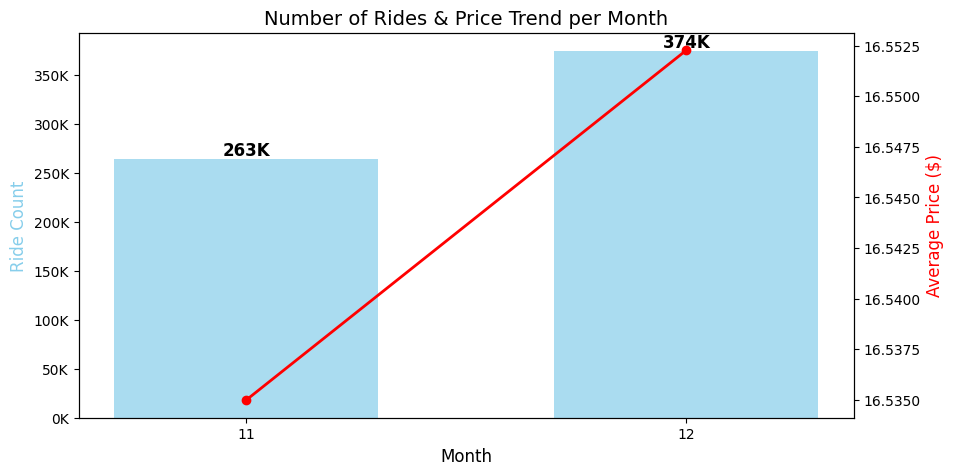

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# Convert Spark DataFrame to Pandas
month_df = month_analysis.toPandas()
day_df = day_analysis.toPandas()
hour_df = hour_analysis.toPandas()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))

# Ensure 'month' is numeric and sorted
month_df["month"] = month_df["month"].astype(int)
month_df = month_df.sort_values("month")

# Create figure and two y-axes
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

# Bar chart (Rides count)
ax1.bar(month_df["month"], month_df["ride_count"], color="skyblue", alpha=0.7, width=0.6)

# Line chart (Price trend)
ax2.plot(month_df["month"], month_df["avg_price"], color="red", marker="o", linewidth=2)

# Format primary y-axis (Ride count) labels in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
ax1.yaxis.set_major_formatter(formatter)

# Add labels on bars
for i, v in enumerate(month_df["ride_count"]):
    ax1.text(month_df["month"].iloc[i], v, f'{int(v/1000)}K', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

# Labels and Titles
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Ride Count", fontsize=12, color="skyblue")
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")

# Set x-axis tick labels correctly
ax1.set_xticks(month_df["month"])  # Ensure all months are displayed
ax1.set_xticklabels(month_df["month"])  # Match x-ticks to months

plt.title("Number of Rides & Price Trend per Month", fontsize=14)
plt.xticks(rotation=0)

plt.show()


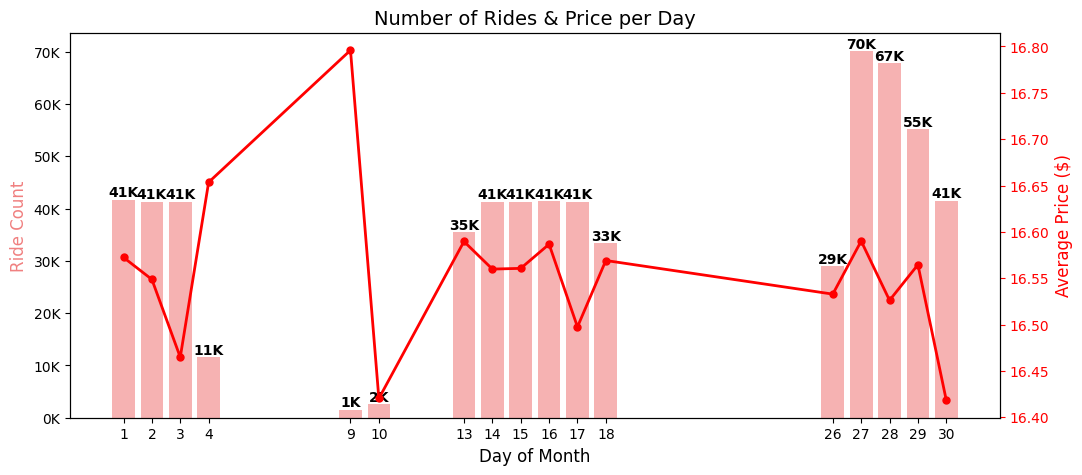

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

# Sort data to ensure correct plotting
day_df = day_df.sort_values(by="day")  # Ensures correct order

# Create figure and main axis
fig, ax1 = plt.subplots(figsize=(12,5))

# Bar chart for ride count
bar_width = 0.8  # Adjust width for better alignment
ax1.bar(day_df["day"], day_df["ride_count"], color="lightcoral", alpha=0.6, width=bar_width)
ax1.set_ylabel("Ride Count", fontsize=12, color="lightcoral")

# Format ride count axis in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
ax1.yaxis.set_major_formatter(formatter)

# Add labels above bars
for x, y in zip(day_df["day"], day_df["ride_count"]):
    ax1.text(x, y, f'{int(y/1000)}K', ha='center', va='bottom', fontsize=10, fontweight='bold', color="black")

# Create second axis for price
ax2 = ax1.twinx()
ax2.plot(day_df["day"], day_df["avg_price"], color="red", marker="o", linewidth=2, markersize=5)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")
ax2.tick_params(axis='y', colors='red')

# Ensure x-axis labels are properly formatted and aligned
ax1.set_xticks(day_df["day"])
ax1.set_xticklabels(day_df["day"], rotation=0)

# Ensure price line connects correctly
ax2.set_xticks(day_df["day"])
ax2.set_xticklabels(day_df["day"])

# Title and Labels
plt.title("Number of Rides & Price per Day", fontsize=14)
ax1.set_xlabel("Day of Month", fontsize=12)

# Show the plot
plt.show()


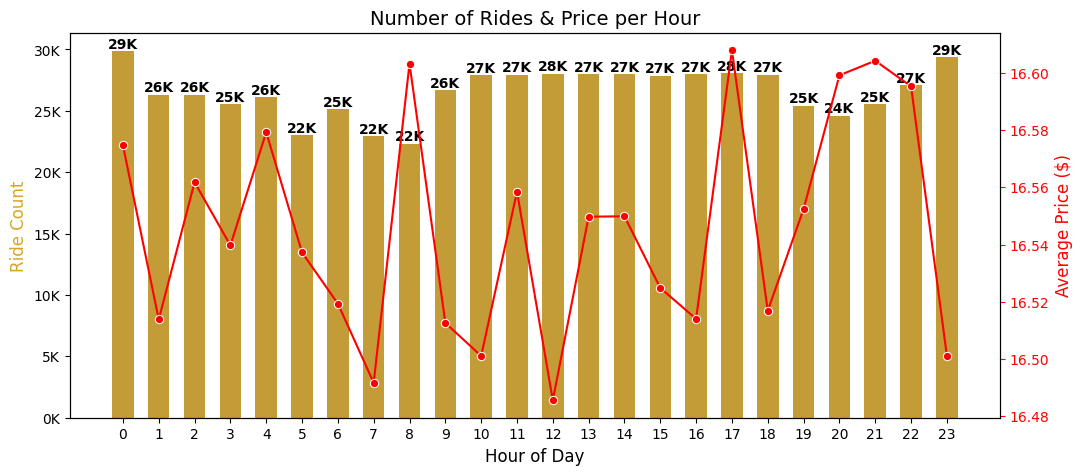

In [111]:
plt.figure(figsize=(12,5))

# Create first axis for ride count (bar chart)
ax1 = sns.barplot(x="hour", y="ride_count", data=hour_df, color="goldenrod", width=0.6)
ax1.set_ylabel("Ride Count", fontsize=12, color="goldenrod")

# Format y-axis labels in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
ax1.yaxis.set_major_formatter(formatter)

# Add formatted labels on each bar
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(f'{int(height/1000)}K',
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# Create second axis for price (line chart)
ax2 = ax1.twinx()
sns.lineplot(x="hour", y="avg_price", data=hour_df, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")
ax2.tick_params(axis='y', colors='red')

# Title and Labels
plt.title("Number of Rides & Price per Hour", fontsize=14)
ax1.set_xlabel("Hour of Day", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(hour_df["hour"])  # Ensure all hours appear

plt.show()


---

###4.1.2 - Time & price analysis - UBER RIDES ONLY:

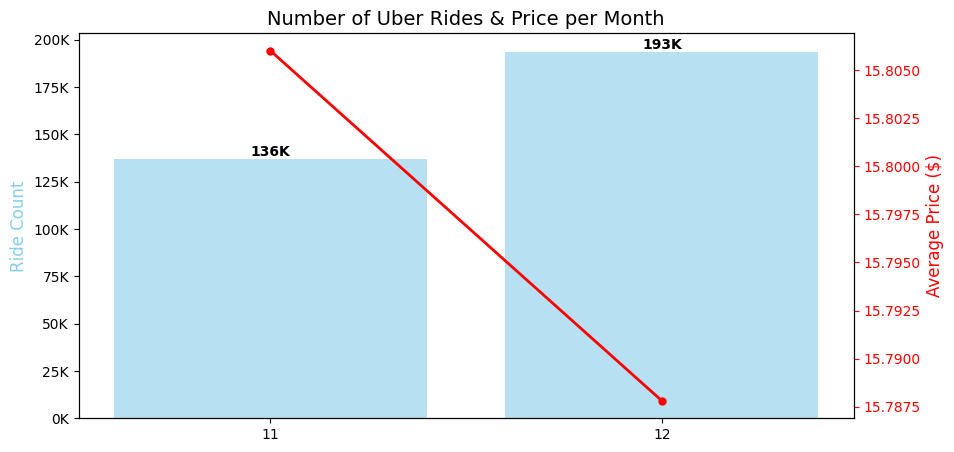

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Filter for Uber rides
uber_df = spark_df.filter(spark_df.cab_type == "Uber")

# Aggregate ride count & average price per month
uber_month_df = uber_df.groupBy("month") \
    .agg({"price": "avg", "*": "count"}) \
    .toPandas().rename(columns={"count(1)": "ride_count", "avg(price)": "avg_price"})

# Sort by month (to ensure proper ordering)
uber_month_df = uber_month_df.sort_values(by="month")

# Create figure and main axis
fig, ax1 = plt.subplots(figsize=(10,5))

# Bar chart for ride count
ax1.bar(uber_month_df["month"], uber_month_df["ride_count"], color="skyblue", alpha=0.6, width=0.8)
ax1.set_ylabel("Ride Count", fontsize=12, color="skyblue")

# Format ride count axis in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
ax1.yaxis.set_major_formatter(formatter)

# Add labels on bars
for x, y in zip(uber_month_df["month"], uber_month_df["ride_count"]):
    ax1.text(x, y, f'{int(y/1000)}K', ha='center', va='bottom', fontsize=10, fontweight='bold', color="black")

# Create second y-axis for price
ax2 = ax1.twinx()
ax2.plot(uber_month_df["month"], uber_month_df["avg_price"], color="red", marker="o", linewidth=2, markersize=5)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")
ax2.tick_params(axis='y', colors='red')

# Set x-axis labels correctly
ax1.set_xticks(uber_month_df["month"])
ax1.set_xticklabels(uber_month_df["month"], rotation=0)

# Title
plt.title("Number of Uber Rides & Price per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)

# Show plot
plt.show()


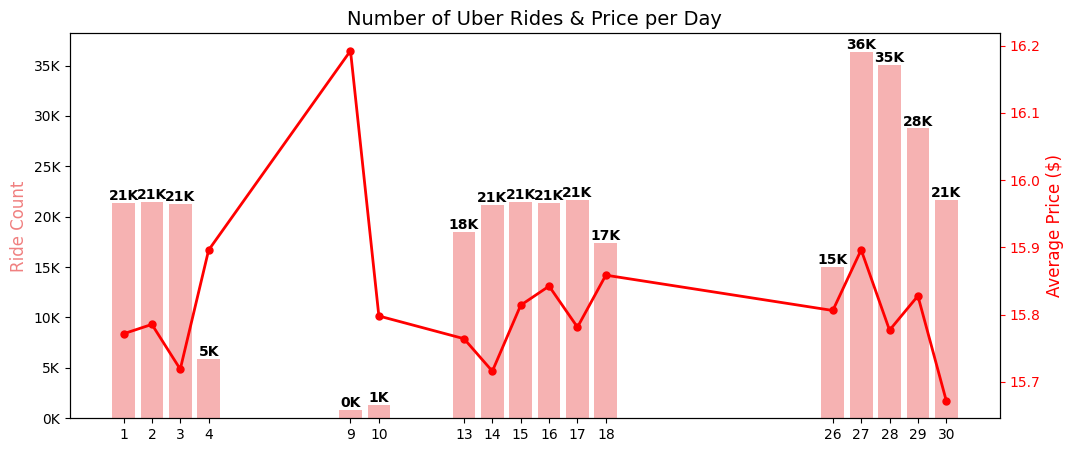

In [113]:
# Aggregate ride count & average price per day
uber_day_df = uber_df.groupBy("day") \
    .agg({"price": "avg", "*": "count"}) \
    .toPandas().rename(columns={"count(1)": "ride_count", "avg(price)": "avg_price"})

# Sort by day
uber_day_df = uber_day_df.sort_values(by="day")

# Create figure and main axis
fig, ax1 = plt.subplots(figsize=(12,5))

# Bar chart for ride count
ax1.bar(uber_day_df["day"], uber_day_df["ride_count"], color="lightcoral", alpha=0.6, width=0.8)
ax1.set_ylabel("Ride Count", fontsize=12, color="lightcoral")

# Format ride count axis in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
ax1.yaxis.set_major_formatter(formatter)

# Add labels on bars
for x, y in zip(uber_day_df["day"], uber_day_df["ride_count"]):
    ax1.text(x, y, f'{int(y/1000)}K', ha='center', va='bottom', fontsize=10, fontweight='bold', color="black")

# Create second y-axis for price
ax2 = ax1.twinx()
ax2.plot(uber_day_df["day"], uber_day_df["avg_price"], color="red", marker="o", linewidth=2, markersize=5)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")
ax2.tick_params(axis='y', colors='red')

# Set x-axis labels correctly
ax1.set_xticks(uber_day_df["day"])
ax1.set_xticklabels(uber_day_df["day"])

# Title
plt.title("Number of Uber Rides & Price per Day", fontsize=14)
plt.xlabel("Day of Month", fontsize=12)

# Show plot
plt.show()


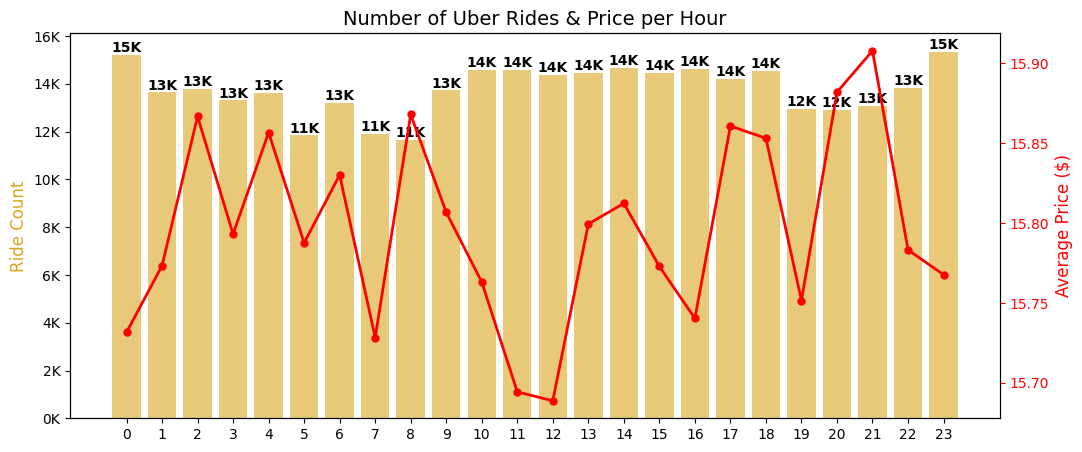

In [114]:
# Aggregate ride count & average price per hour
uber_hour_df = uber_df.groupBy("hour") \
    .agg({"price": "avg", "*": "count"}) \
    .toPandas().rename(columns={"count(1)": "ride_count", "avg(price)": "avg_price"})

# Sort by hour
uber_hour_df = uber_hour_df.sort_values(by="hour")

# Create figure and main axis
fig, ax1 = plt.subplots(figsize=(12,5))

# Bar chart for ride count
ax1.bar(uber_hour_df["hour"], uber_hour_df["ride_count"], color="goldenrod", alpha=0.6, width=0.8)
ax1.set_ylabel("Ride Count", fontsize=12, color="goldenrod")

# Format ride count axis in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
ax1.yaxis.set_major_formatter(formatter)

# Add labels on bars
for x, y in zip(uber_hour_df["hour"], uber_hour_df["ride_count"]):
    ax1.text(x, y, f'{int(y/1000)}K', ha='center', va='bottom', fontsize=10, fontweight='bold', color="black")

# Create second y-axis for price
ax2 = ax1.twinx()
ax2.plot(uber_hour_df["hour"], uber_hour_df["avg_price"], color="red", marker="o", linewidth=2, markersize=5)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")
ax2.tick_params(axis='y', colors='red')

# Set x-axis labels correctly
ax1.set_xticks(uber_hour_df["hour"])
ax1.set_xticklabels(uber_hour_df["hour"])

# Title
plt.title("Number of Uber Rides & Price per Hour", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)

# Show plot
plt.show()


---

###4.1.3 - Time & price analysis - LYFT RIDES ONLY:

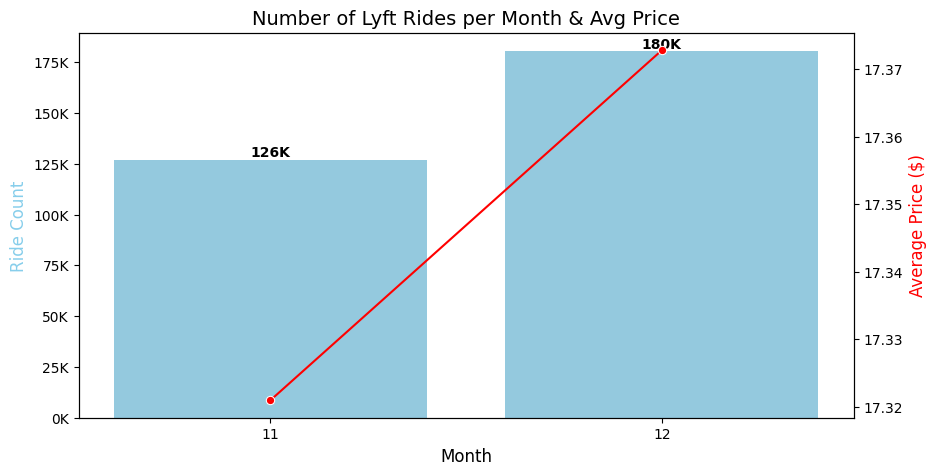

In [115]:
from pyspark.sql import functions as F

from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


lyft_df = spark_df.filter(spark_df.cab_type == "Lyft")

lyft_month_df = lyft_df.groupBy("month").count().toPandas().rename(columns={"count": "ride_count"})
lyft_day_df = lyft_df.groupBy("day").count().toPandas().rename(columns={"count": "ride_count"})
lyft_hour_df = lyft_df.groupBy("hour").count().toPandas().rename(columns={"count": "ride_count"})


# Aggregate ride count & average price
lyft_month_df = lyft_df.groupBy("month").agg(
    F.count("*").alias("ride_count"),
    F.avg("price").alias("avg_price")
).toPandas()

# Convert month to integer for sorting
lyft_month_df["month"] = lyft_month_df["month"].astype(int)

# Sort by month in ascending order
lyft_month_df = lyft_month_df.sort_values("month")

# Convert month back to string for proper categorical plotting
lyft_month_df["month"] = lyft_month_df["month"].astype(str)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for ride count
sns.barplot(x="month", y="ride_count", data=lyft_month_df, color="skyblue", ax=ax1)
ax1.set_ylabel("Ride Count", fontsize=12, color="skyblue")
ax1.set_xlabel("Month", fontsize=12)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Secondary y-axis for average price
ax2 = ax1.twinx()
sns.lineplot(x="month", y="avg_price", data=lyft_month_df, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")

# Annotations for ride count
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Number of Lyft Rides per Month & Avg Price", fontsize=14)
plt.xticks(rotation=0)  # Ensure months are properly displayed
plt.show()




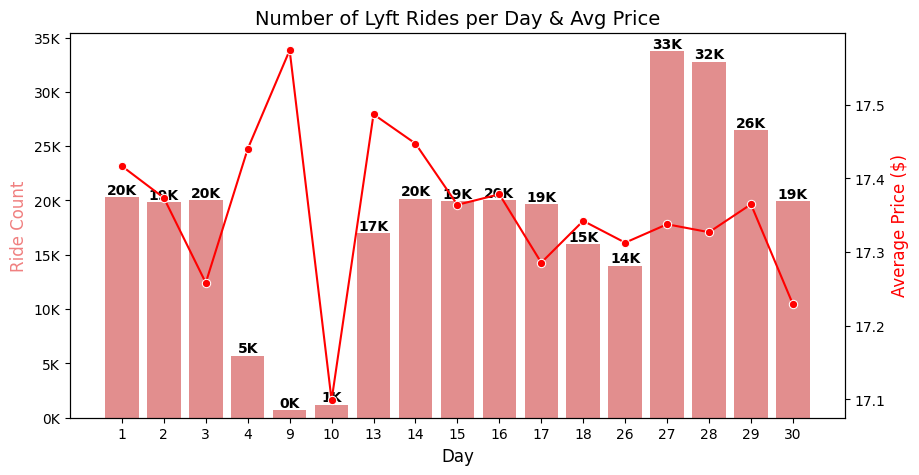

In [116]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Aggregate ride count & average price
lyft_day_df = lyft_df.groupBy("day").agg(
    F.count("*").alias("ride_count"),
    F.avg("price").alias("avg_price")
).toPandas()

# Convert 'day' to integer for correct sorting
lyft_day_df["day"] = lyft_day_df["day"].astype(int)

# Sort the data by day in ascending order
lyft_day_df = lyft_day_df.sort_values("day")

# Convert back to string for categorical plotting
lyft_day_df["day"] = lyft_day_df["day"].astype(str)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for ride count
sns.barplot(x="day", y="ride_count", data=lyft_day_df, color="lightcoral", ax=ax1)
ax1.set_ylabel("Ride Count", fontsize=12, color="lightcoral")
ax1.set_xlabel("Day", fontsize=12)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Secondary y-axis for price
ax2 = ax1.twinx()
sns.lineplot(x="day", y="avg_price", data=lyft_day_df, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")

# Annotations for ride count
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Number of Lyft Rides per Day & Avg Price", fontsize=14)
plt.xticks(rotation=0)
plt.show()


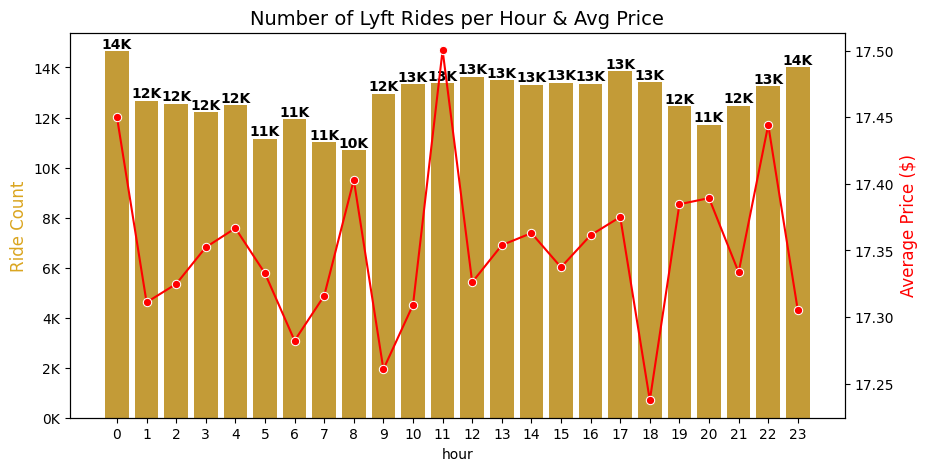

In [117]:
lyft_hour_df = lyft_df.groupBy("hour").agg(
    F.count("*").alias("ride_count"),
    F.avg("price").alias("avg_price")
).toPandas()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for ride count
sns.barplot(x="hour", y="ride_count", data=lyft_hour_df, color="goldenrod", ax=ax1)
ax1.set_ylabel("Ride Count", fontsize=12, color="goldenrod")
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Secondary y-axis for price
ax2 = ax1.twinx()
sns.lineplot(x="hour", y="avg_price", data=lyft_hour_df, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Average Price ($)", fontsize=12, color="red")

# Annotations for ride count
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Number of Lyft Rides per Hour & Avg Price", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.xticks(rotation=0)
plt.show()


##4.2 - Source and Destination Analysis Overall - Uber vs. Lyft

###4.2.1 - Source and Destination Analysis Overall:

In [118]:
from pyspark.sql.functions import col, count

# Count number of rides per source
source_counts = spark_df.groupBy("source").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Count number of rides per destination
destination_counts = spark_df.groupBy("destination").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Show top 10 sources
source_counts.show(10)

# Show top 10 destinations
destination_counts.show()


+--------------------+----------+
|              source|ride_count|
+--------------------+----------+
|  Financial District|     54197|
|            Back Bay|     53201|
|    Theatre District|     53201|
|   Boston University|     53172|
|           North End|     53171|
|              Fenway|     53166|
|Northeastern Univ...|     53164|
|       South Station|     53160|
|    Haymarket Square|     53147|
|            West End|     52980|
+--------------------+----------+
only showing top 10 rows

+--------------------+----------+
|         destination|ride_count|
+--------------------+----------+
|  Financial District|     54192|
|            Back Bay|     53190|
|    Theatre District|     53189|
|   Boston University|     53171|
|    Haymarket Square|     53171|
|              Fenway|     53166|
|Northeastern Univ...|     53165|
|           North End|     53164|
|       South Station|     53159|
|            West End|     52992|
|         Beacon Hill|     52840|
|       North Station|

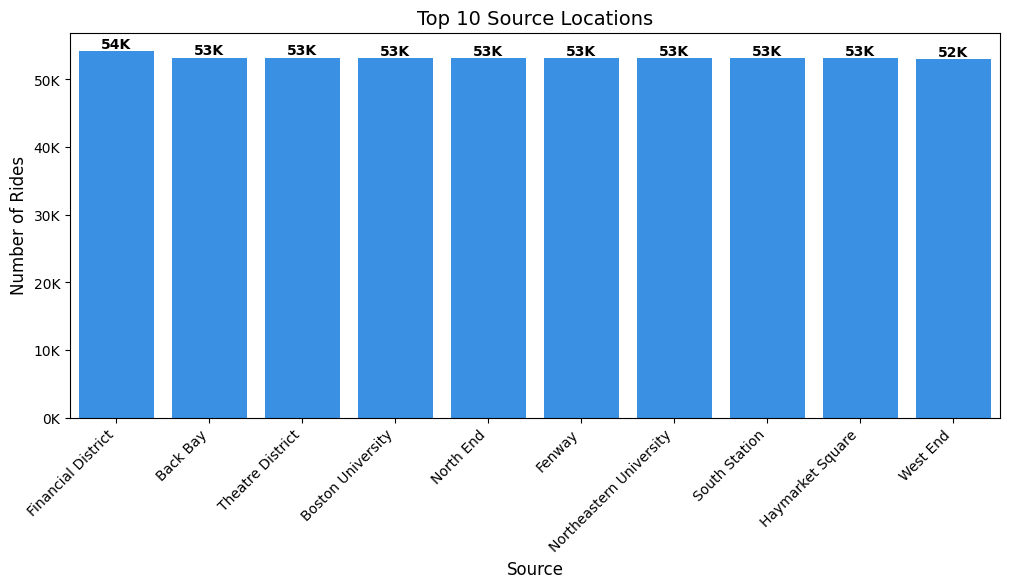

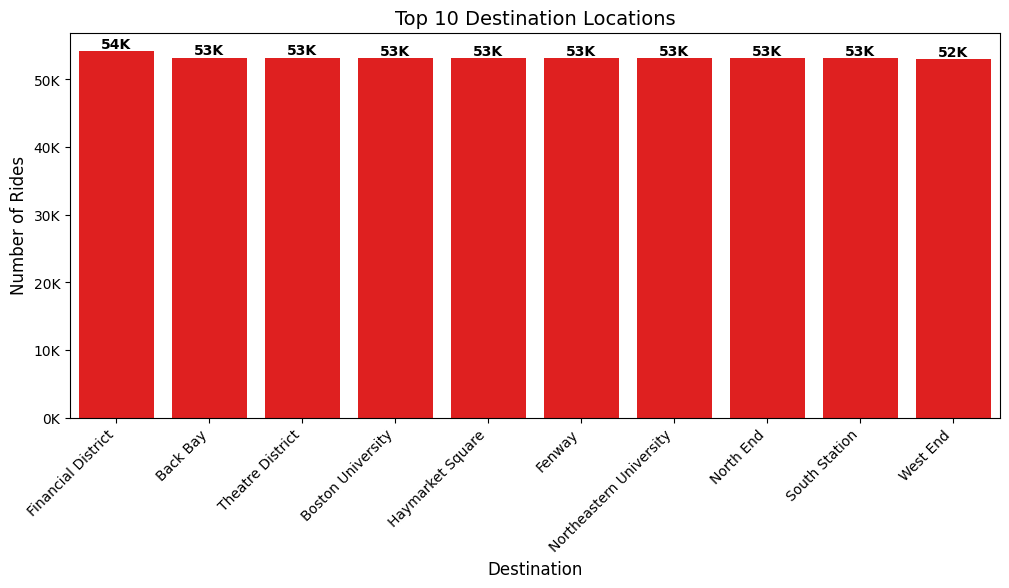

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Convert source and destination counts to Pandas
source_pdf = source_counts.limit(10).toPandas()  # Use limit(10) to avoid collecting too much data
destination_pdf = destination_counts.limit(10).toPandas()

# Function to plot histogram
def plot_bar_chart(data, x_col, y_col, title, color):
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(data=data, x=x_col, y=y_col, hue=None, legend=False, color=color)

    # Format labels in thousands (K)
    formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
    ax.yaxis.set_major_formatter(formatter)

    # Add labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()/1000)}K',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_col.capitalize(), fontsize=12)
    plt.ylabel("Number of Rides", fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

# Plot Top 10 Source Locations
plot_bar_chart(source_pdf, "source", "ride_count", "Top 10 Source Locations", "dodgerblue")

# Plot Top 10 Destination Locations
plot_bar_chart(destination_pdf, "destination", "ride_count", "Top 10 Destination Locations", "red")


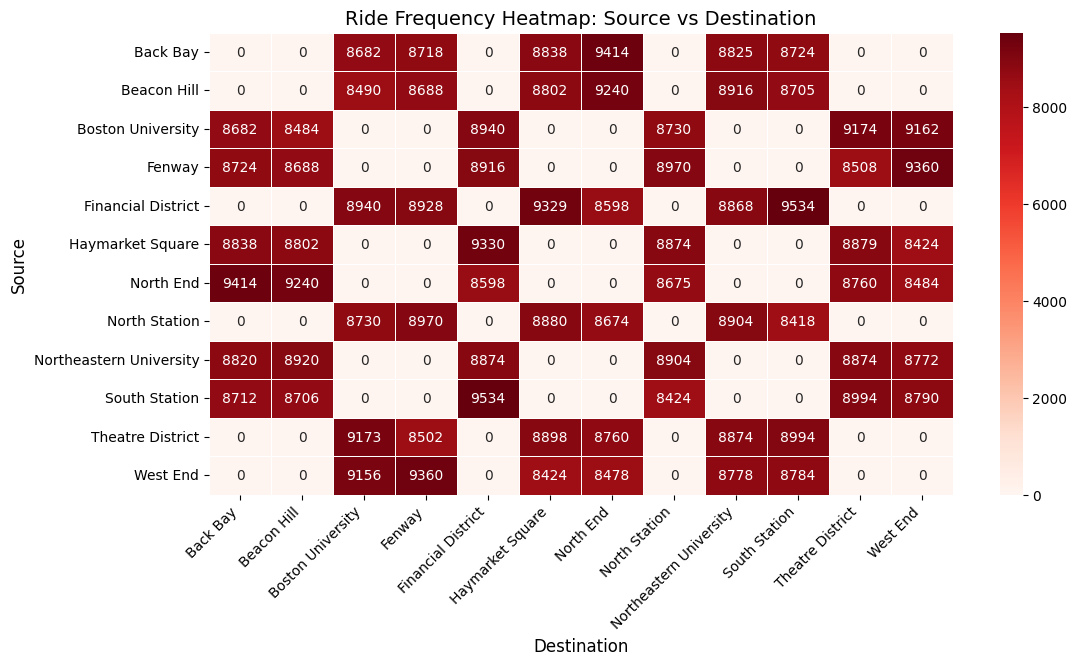

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate ride count for each source-destination pair
route_df = spark_df.groupBy("source", "destination").agg(
    F.count("*").alias("ride_count")
).toPandas()

# Pivot data for heatmap
pivot_df = route_df.pivot(index="source", columns="destination", values="ride_count").fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")

# Labels and Formatting
plt.title("Ride Frequency Heatmap: Source vs Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Source", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


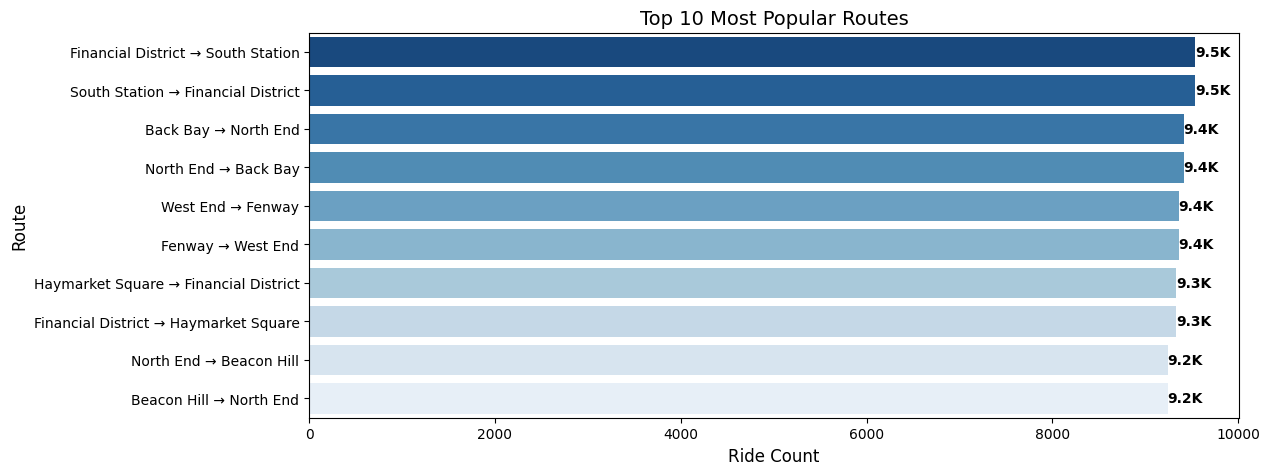

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate ride count for each source-destination pair
route_df = spark_df.groupBy("source", "destination").agg(
    F.count("*").alias("ride_count")
).toPandas()

# Create a combined 'route' column
route_df["route"] = route_df["source"] + " → " + route_df["destination"]

# Sort by ride count and get top 10 routes
top_routes = route_df.sort_values("ride_count", ascending=False).head(10)

# Plot bar chart with proper `hue` setting to fix the warning
plt.figure(figsize=(12, 5))
sns.barplot(x="ride_count", y="route", data=top_routes, hue="route", palette="Blues_r", legend=False)

# Labels and Title
plt.xlabel("Ride Count", fontsize=12)
plt.ylabel("Route", fontsize=12)
plt.title("Top 10 Most Popular Routes", fontsize=14)

# Annotate ride count values in thousands (e.g., "1K", "2K")
for index, value in enumerate(top_routes["ride_count"]):
    plt.text(value, index, f"{value/1000:.1f}K", va="center", ha="left", fontsize=10, fontweight="bold")

plt.show()


###4.2.2 - Source and Destination Analysis - UBER ONLY:

In [122]:
from pyspark.sql.functions import col, count

# Filter dataset for Uber rides only
uber_df = spark_df.filter(col("cab_type") == "Uber")

# Count number of rides per source
source_counts = uber_df.groupBy("source").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Count number of rides per destination
destination_counts = uber_df.groupBy("destination").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Show top 10 sources
source_counts.show(10)

# Show top 10 destinations
destination_counts.show(10)


+--------------------+----------+
|              source|ride_count|
+--------------------+----------+
|  Financial District|     27960|
|    Theatre District|     27671|
|   Boston University|     27552|
|           North End|     27551|
|Northeastern Univ...|     27550|
|            Back Bay|     27546|
|              Fenway|     27546|
|       South Station|     27540|
|    Haymarket Square|     27533|
|            West End|     27492|
+--------------------+----------+
only showing top 10 rows

+--------------------+----------+
|         destination|ride_count|
+--------------------+----------+
|  Financial District|     27954|
|    Theatre District|     27653|
|    Haymarket Square|     27558|
|   Boston University|     27557|
|           North End|     27550|
|Northeastern Univ...|     27546|
|              Fenway|     27546|
|            Back Bay|     27540|
|       South Station|     27539|
|            West End|     27498|
+--------------------+----------+
only showing top 10 ro

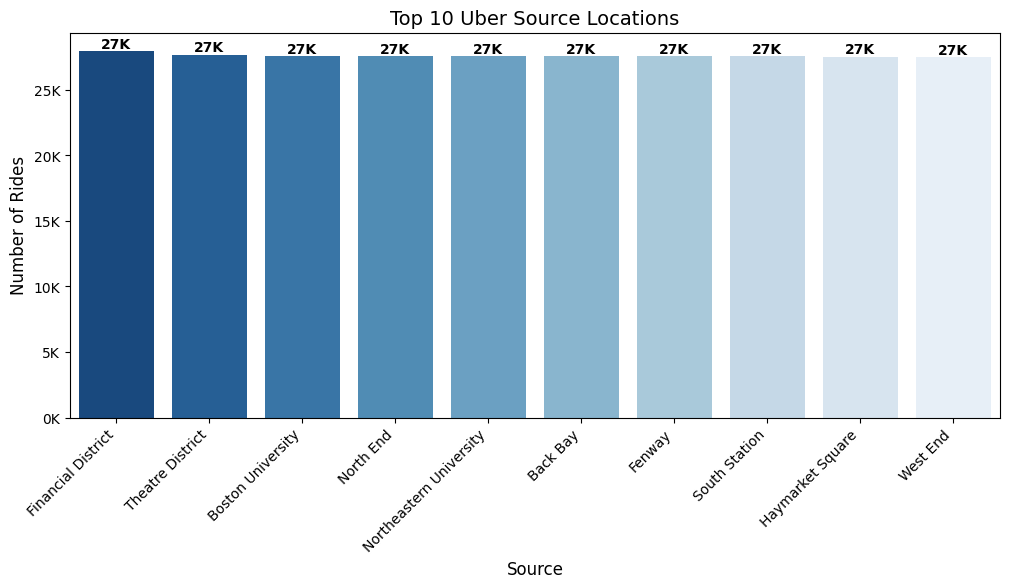

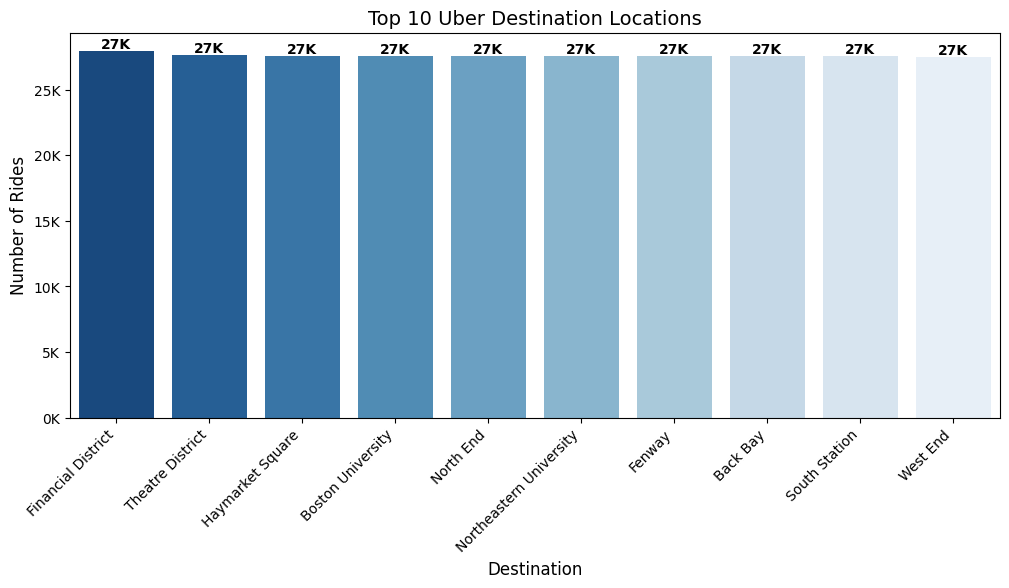

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Convert source and destination counts to Pandas
source_pdf = source_counts.limit(10).toPandas()
destination_pdf = destination_counts.limit(10).toPandas()

# Function to plot histogram
def plot_bar_chart(data, x_col, y_col, title, color):
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(data=data, x=x_col, y=y_col, hue=x_col, palette="Blues_r", legend=False)  # Fixed hue issue

    # Format labels in thousands (K)
    formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
    ax.yaxis.set_major_formatter(formatter)

    # Add labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()/1000)}K',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_col.capitalize(), fontsize=12)
    plt.ylabel("Number of Rides", fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

# Plot Top 10 Source Locations
plot_bar_chart(source_pdf, "source", "ride_count", "Top 10 Uber Source Locations", "dodgerblue")

# Plot Top 10 Destination Locations
plot_bar_chart(destination_pdf, "destination", "ride_count", "Top 10 Uber Destination Locations", "red")


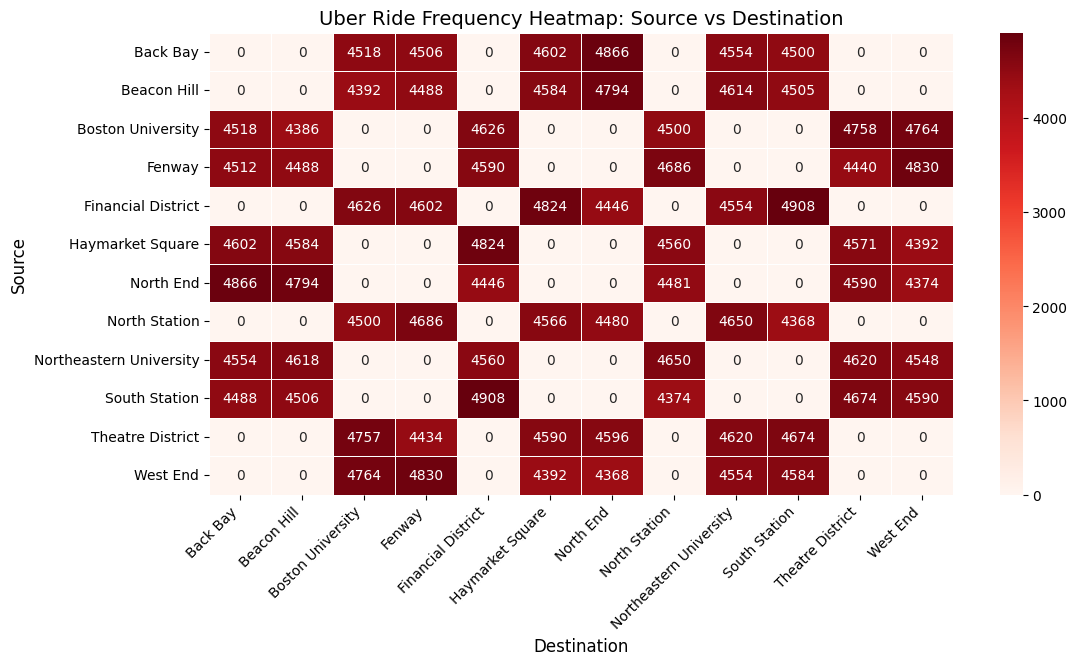

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate ride count for each source-destination pair
route_df = uber_df.groupBy("source", "destination").agg(
    F.count("*").alias("ride_count")
).toPandas()

# Pivot data for heatmap
pivot_df = route_df.pivot(index="source", columns="destination", values="ride_count").fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")

# Labels and Formatting
plt.title("Uber Ride Frequency Heatmap: Source vs Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Source", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


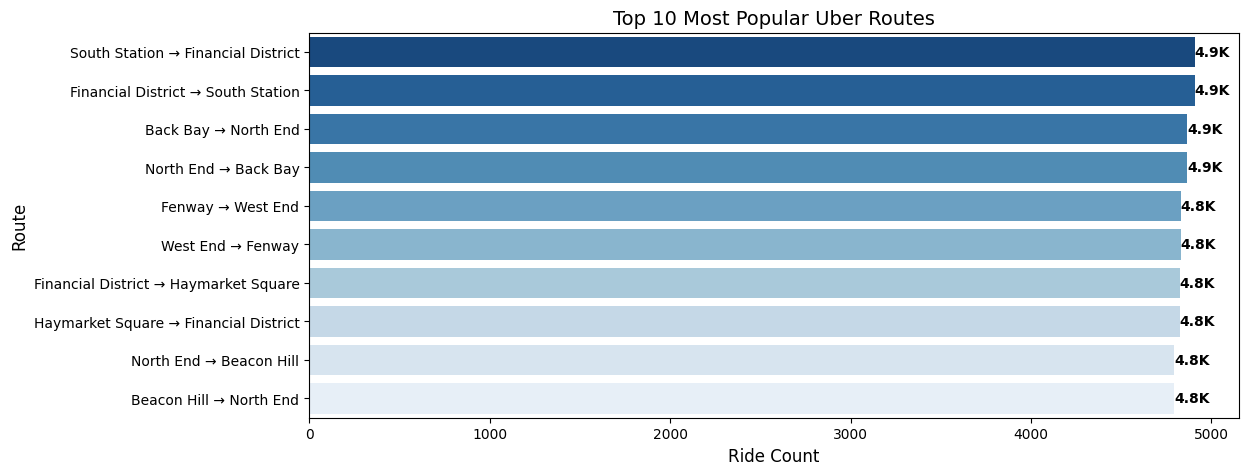

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate ride count for each source-destination pair
route_df = uber_df.groupBy("source", "destination").agg(
    F.count("*").alias("ride_count")
).toPandas()

# Create a combined 'route' column
route_df["route"] = route_df["source"] + " → " + route_df["destination"]

# Sort by ride count and get top 10 routes
top_routes = route_df.sort_values("ride_count", ascending=False).head(10)

# Plot bar chart with proper `hue` setting to fix the warning
plt.figure(figsize=(12, 5))
sns.barplot(x="ride_count", y="route", data=top_routes, hue="route", palette="Blues_r", legend=False)

# Labels and Title
plt.xlabel("Ride Count", fontsize=12)
plt.ylabel("Route", fontsize=12)
plt.title("Top 10 Most Popular Uber Routes", fontsize=14)

# Annotate ride count values in thousands (e.g., "1K", "2K")
for index, value in enumerate(top_routes["ride_count"]):
    plt.text(value, index, f"{value/1000:.1f}K", va="center", ha="left", fontsize=10, fontweight="bold")

plt.show()


###4.2.3 - Source and Destination Analysis - LYFT ONLY:

In [126]:
from pyspark.sql.functions import col, count

# Filter dataset for Lyft rides only
lyft_df = spark_df.filter(col("cab_type") == "Lyft")

# Count number of rides per source
source_counts = lyft_df.groupBy("source").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Count number of rides per destination
destination_counts = lyft_df.groupBy("destination").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Show top 10 sources
source_counts.show(10)

# Show top 10 destinations
destination_counts.show(10)


+--------------------+----------+
|              source|ride_count|
+--------------------+----------+
|  Financial District|     26237|
|            Back Bay|     25655|
|           North End|     25620|
|   Boston University|     25620|
|       South Station|     25620|
|              Fenway|     25620|
|Northeastern Univ...|     25614|
|    Haymarket Square|     25614|
|    Theatre District|     25530|
|            West End|     25488|
+--------------------+----------+
only showing top 10 rows

+--------------------+----------+
|         destination|ride_count|
+--------------------+----------+
|  Financial District|     26238|
|            Back Bay|     25650|
|       South Station|     25620|
|              Fenway|     25620|
|Northeastern Univ...|     25619|
|           North End|     25614|
|   Boston University|     25614|
|    Haymarket Square|     25613|
|    Theatre District|     25536|
|            West End|     25494|
+--------------------+----------+
only showing top 10 ro

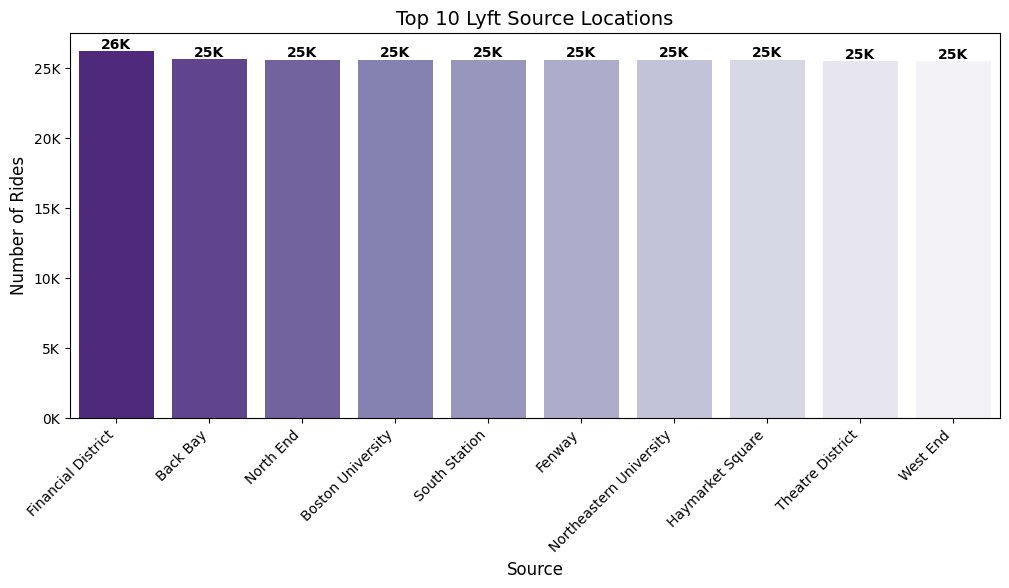

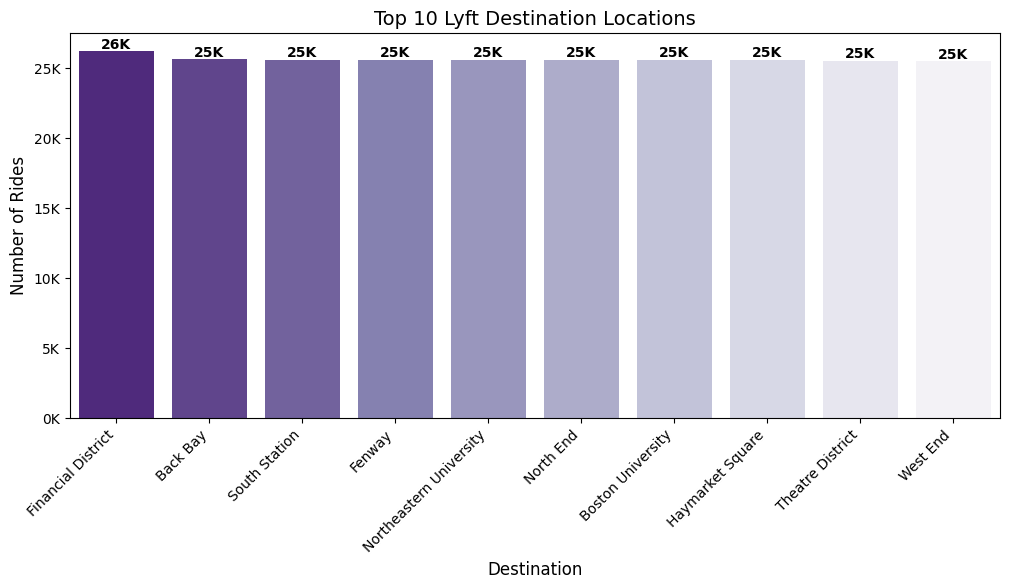

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Convert source and destination counts to Pandas
source_pdf = source_counts.limit(10).toPandas()
destination_pdf = destination_counts.limit(10).toPandas()

# Function to plot histogram
def plot_bar_chart(data, x_col, y_col, title, color):
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(data=data, x=x_col, y=y_col, hue=x_col, palette="Purples_r", legend=False)  # Fixed hue issue

    # Format labels in thousands (K)
    formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
    ax.yaxis.set_major_formatter(formatter)

    # Add labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()/1000)}K',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_col.capitalize(), fontsize=12)
    plt.ylabel("Number of Rides", fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

# Plot Top 10 Source Locations
plot_bar_chart(source_pdf, "source", "ride_count", "Top 10 Lyft Source Locations", "mediumpurple")

# Plot Top 10 Destination Locations
plot_bar_chart(destination_pdf, "destination", "ride_count", "Top 10 Lyft Destination Locations", "indigo")


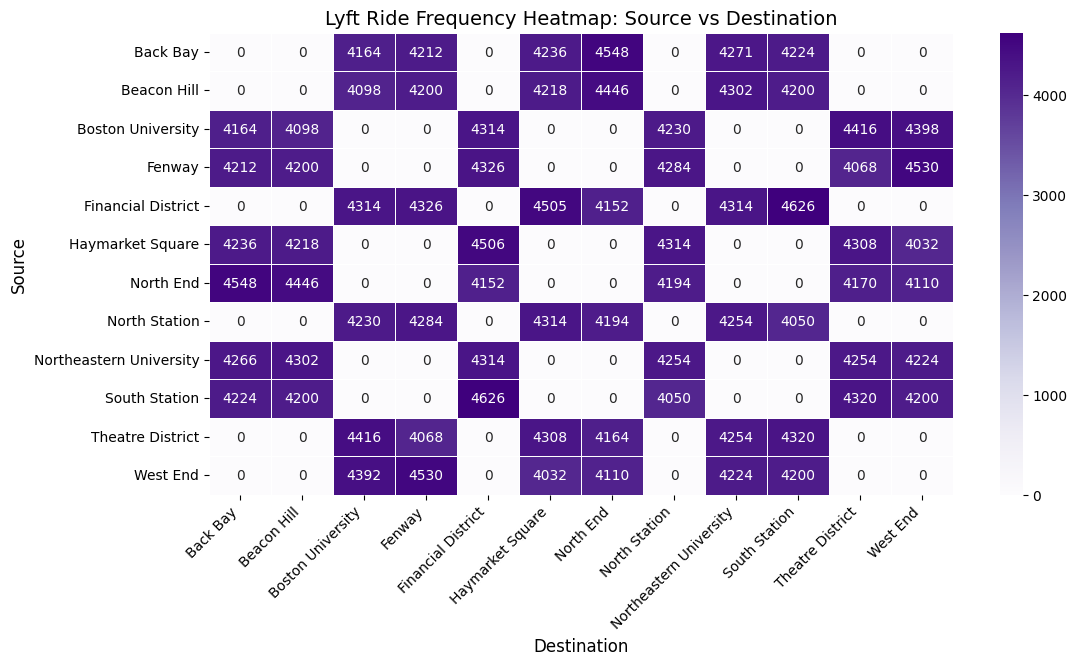

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate ride count for each source-destination pair
route_df = lyft_df.groupBy("source", "destination").agg(
    F.count("*").alias("ride_count")
).toPandas()

# Pivot data for heatmap
pivot_df = route_df.pivot(index="source", columns="destination", values="ride_count").fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="Purples", linewidths=0.5, annot=True, fmt=".0f")

# Labels and Formatting
plt.title("Lyft Ride Frequency Heatmap: Source vs Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Source", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


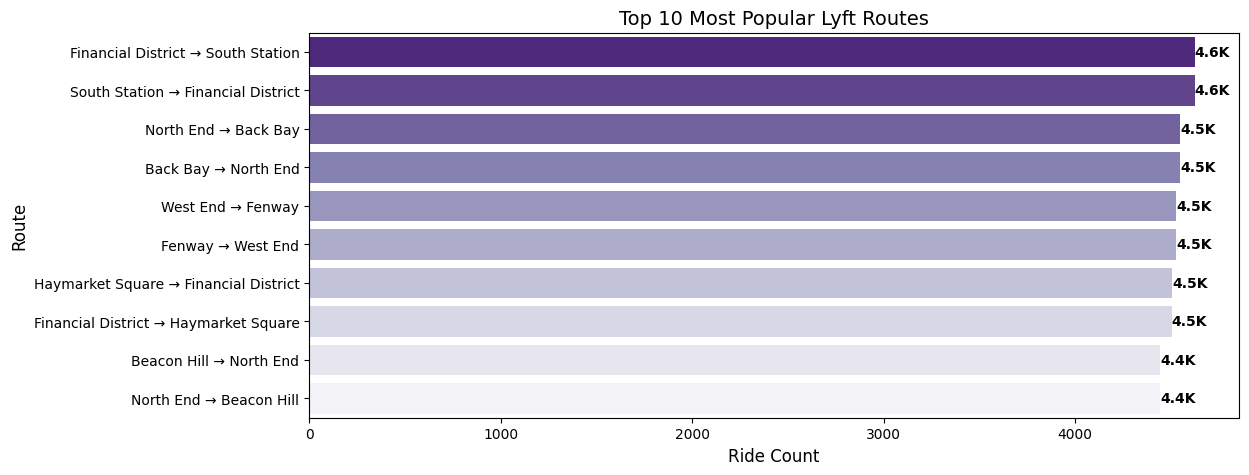

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate ride count for each source-destination pair
route_df = lyft_df.groupBy("source", "destination").agg(
    F.count("*").alias("ride_count")
).toPandas()

# Create a combined 'route' column
route_df["route"] = route_df["source"] + " → " + route_df["destination"]

# Sort by ride count and get top 10 routes
top_routes = route_df.sort_values("ride_count", ascending=False).head(10)

# Plot bar chart with proper `hue` setting to fix the warning
plt.figure(figsize=(12, 5))
sns.barplot(x="ride_count", y="route", data=top_routes, hue="route", palette="Purples_r", legend=False)

# Labels and Title
plt.xlabel("Ride Count", fontsize=12)
plt.ylabel("Route", fontsize=12)
plt.title("Top 10 Most Popular Lyft Routes", fontsize=14)

# Annotate ride count values in thousands (e.g., "1K", "2K")
for index, value in enumerate(top_routes["ride_count"]):
    plt.text(value, index, f"{value/1000:.1f}K", va="center", ha="left", fontsize=10, fontweight="bold")

plt.show()


##4.3 - Car Type Analysis Overall - Uber vs. Lyft

In [130]:
from pyspark.sql.functions import col, count

# Count rides per cab type
cab_type_counts = spark_df.groupBy("cab_type").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Show results
cab_type_counts.show()


+--------+----------+
|cab_type|ride_count|
+--------+----------+
|    Uber|    330568|
|    Lyft|    307408|
+--------+----------+



In [131]:
from pyspark.sql.functions import count

# Count rides for each car type grouped by cab type (Uber vs Lyft)
cab_car_counts = spark_df.groupBy("cab_type", "name").agg(count("*").alias("ride_count"))

# Sort by cab_type first, then by ride_count descending
cab_car_counts.orderBy(col("cab_type").asc(), col("ride_count").desc()).show(20)  # Show top 20


+--------+------------+----------+
|cab_type|        name|ride_count|
+--------+------------+----------+
|    Lyft|     Lyft XL|     51235|
|    Lyft|         Lux|     51235|
|    Lyft|        Lyft|     51235|
|    Lyft|   Lux Black|     51235|
|    Lyft|Lux Black XL|     51235|
|    Lyft|      Shared|     51233|
|    Uber|   Black SUV|     55096|
|    Uber|      UberXL|     55096|
|    Uber|         WAV|     55096|
|    Uber|       Black|     55095|
|    Uber|       UberX|     55094|
|    Uber|    UberPool|     55091|
+--------+------------+----------+



In [132]:
from pyspark.sql.functions import avg

# Calculate average price per cab type
avg_price_cab = spark_df.groupBy("cab_type").agg(avg("price").alias("avg_price"))

# Show results
avg_price_cab.show()


+--------+------------------+
|cab_type|         avg_price|
+--------+------------------+
|    Lyft| 17.35139612501952|
|    Uber|15.795343166912708|
+--------+------------------+



In [133]:
from pyspark.sql.functions import avg

# Calculate average price per car type and cab type
avg_price_car = spark_df.groupBy("cab_type", "name").agg(avg("price").alias("avg_price"))

# Show results sorted by cab_type first, then by avg_price descending
avg_price_car.orderBy(col("cab_type").asc(), col("avg_price").desc()).show()


+--------+------------+------------------+
|cab_type|        name|         avg_price|
+--------+------------+------------------+
|    Lyft|Lux Black XL|32.324086073972865|
|    Lyft|   Lux Black| 23.06246803942617|
|    Lyft|         Lux|17.771240363033083|
|    Lyft|     Lyft XL|15.309362740314237|
|    Lyft|        Lyft| 9.610884746755147|
|    Lyft|      Shared| 6.029892842503855|
|    Uber|   Black SUV|30.286763104399594|
|    Uber|       Black|20.523786187494327|
|    Uber|      UberXL|15.678143603891389|
|    Uber|       UberX| 9.765074236758993|
|    Uber|         WAV| 9.765019239146218|
|    Uber|    UberPool| 8.752500408415168|
+--------+------------+------------------+



In [134]:
from pyspark.sql.functions import col, count

# Count number of rides per car type (using 'name' instead of 'car_type')
car_type_counts = spark_df.groupBy("name").agg(count("*").alias("ride_count")).orderBy(col("ride_count").desc())

# Show results
car_type_counts.show()


+------------+----------+
|        name|ride_count|
+------------+----------+
|   Black SUV|     55096|
|      UberXL|     55096|
|         WAV|     55096|
|       Black|     55095|
|       UberX|     55094|
|    UberPool|     55091|
|         Lux|     51235|
|     Lyft XL|     51235|
|Lux Black XL|     51235|
|        Lyft|     51235|
|   Lux Black|     51235|
|      Shared|     51233|
+------------+----------+



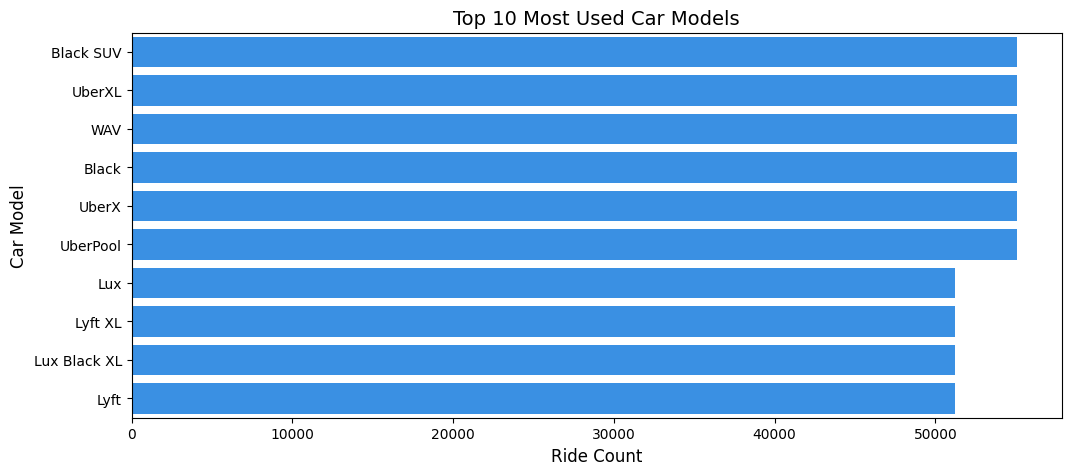

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas (limit to top 10 for visualization)
car_type_pdf = car_type_counts.limit(10).toPandas()

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x="ride_count", y="name", data=car_type_pdf, color="dodgerblue")
plt.xlabel("Ride Count", fontsize=12)
plt.ylabel("Car Model", fontsize=12)
plt.title("Top 10 Most Used Car Models", fontsize=14)
plt.show()


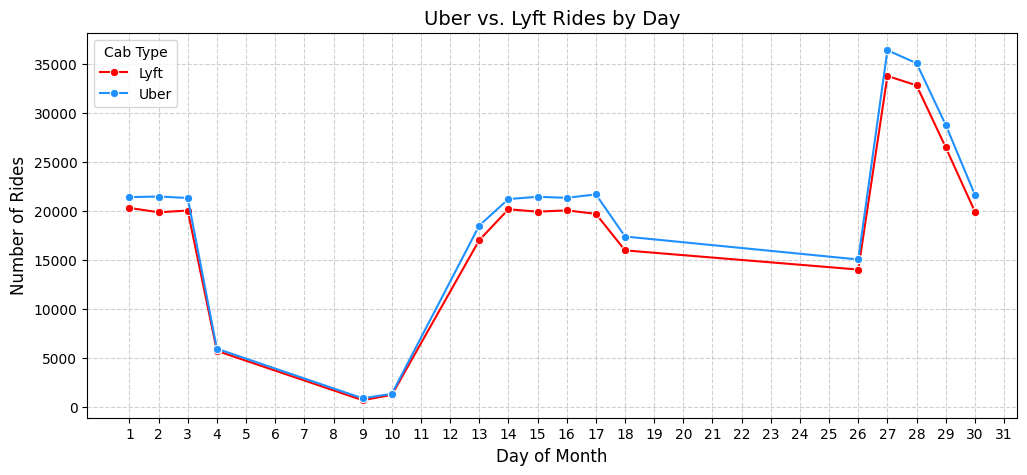

In [136]:
# Count rides per day for each cab type
rides_by_day = spark_df.groupBy("cab_type", "day").agg(count("*").alias("ride_count")).toPandas()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=rides_by_day, x="day", y="ride_count", hue="cab_type", marker="o", palette={"Uber": "dodgerblue", "Lyft": "red"})

# Labels & Title
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Uber vs. Lyft Rides by Day", fontsize=14)
plt.xticks(range(1, 32))  # Assuming data covers full month, adjust as needed
plt.legend(title="Cab Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


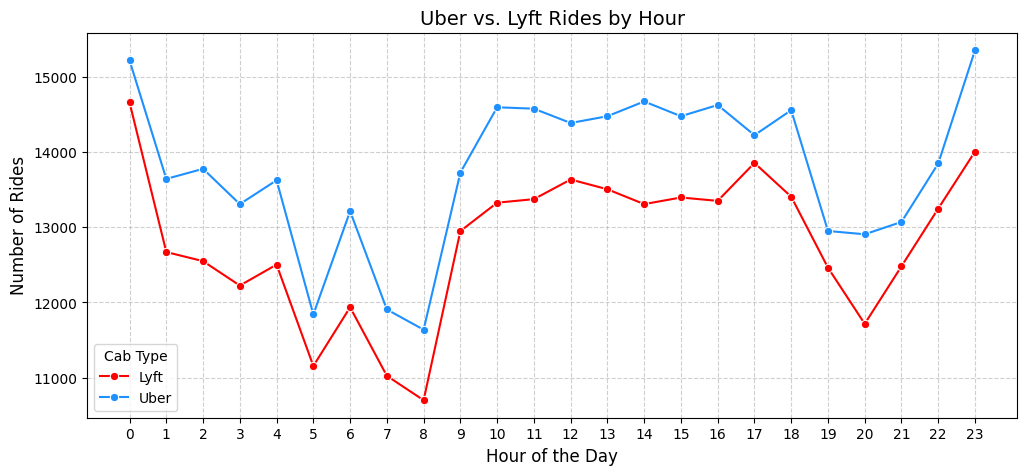

In [137]:
# Count rides per hour for each cab type
rides_by_hour = spark_df.groupBy("cab_type", "hour").agg(count("*").alias("ride_count")).toPandas()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=rides_by_hour, x="hour", y="ride_count", hue="cab_type", marker="o", palette={"Uber": "dodgerblue", "Lyft": "red"})

# Labels & Title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Uber vs. Lyft Rides by Hour", fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title="Cab Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


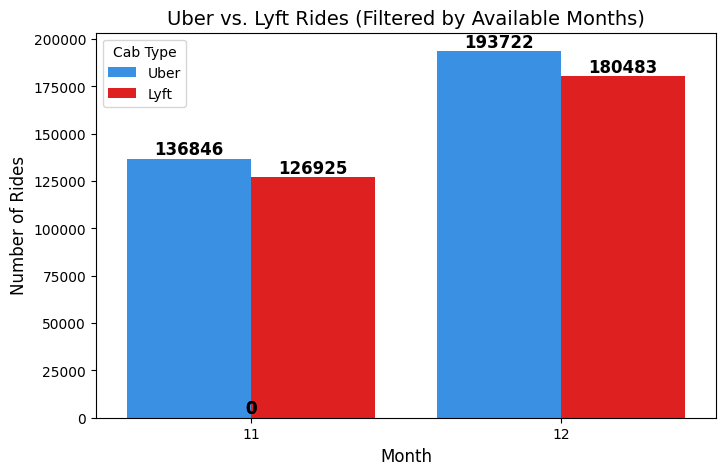

In [138]:
# Count rides per month for each cab type
rides_by_month = spark_df.groupBy("cab_type", "month").agg(count("*").alias("ride_count")).toPandas()

# Keep only the two months available in data
available_months = sorted(rides_by_month["month"].unique())[:2]  # Get the first two months
rides_by_month = rides_by_month[rides_by_month["month"].isin(available_months)]

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=rides_by_month, x="month", y="ride_count", hue="cab_type", palette={"Uber": "dodgerblue", "Lyft": "red"})

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

# Labels & Title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Uber vs. Lyft Rides (Filtered by Available Months)", fontsize=14)
plt.xticks(range(len(available_months)), available_months)
plt.legend(title="Cab Type")
plt.show()


##4.4 - Price Analysis Overall - Uber & Lyft

<ipython-input-139-44fd6501948f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_cab_pdf, x="cab_type", y="avg_price", palette={"Uber": "dodgerblue", "Lyft": "red"})


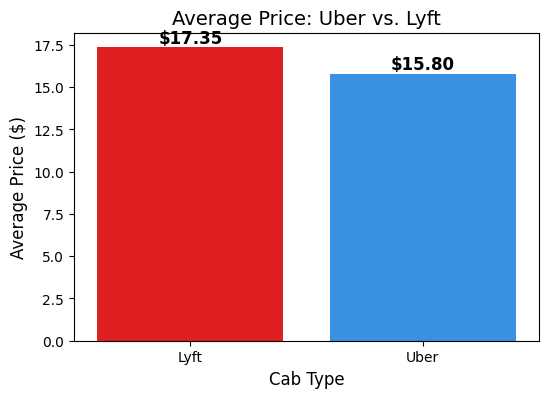

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas
avg_price_cab_pdf = avg_price_cab.toPandas()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_price_cab_pdf, x="cab_type", y="avg_price", palette={"Uber": "dodgerblue", "Lyft": "red"})

# Labels & Title
plt.xlabel("Cab Type", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Price: Uber vs. Lyft", fontsize=14)

# Show values on bars
for index, value in enumerate(avg_price_cab_pdf["avg_price"]):
    plt.text(index, value, f"${value:.2f}", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.show()


In [140]:
from pyspark.sql.functions import approx_percentile

# Compute percentiles to understand distribution
percentiles = spark_df.approxQuantile("price", [0.25, 0.5, 0.75, 0.95], 0.01)
print(f"Price Distribution Percentiles: {percentiles}")


Price Distribution Percentiles: [9.0, 14.0, 22.5, 33.0]


<ipython-input-141-397554b1f904>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cab Type")


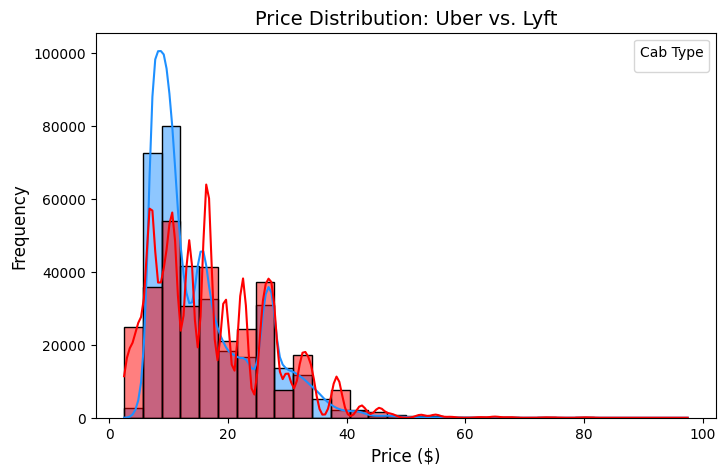

In [141]:
plt.figure(figsize=(8, 5))
sns.histplot(data=spark_df.toPandas(), x="price", hue="cab_type", bins=30, kde=True, palette={"Uber": "dodgerblue", "Lyft": "red"})

plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Price Distribution: Uber vs. Lyft", fontsize=14)
plt.legend(title="Cab Type")

plt.show()


In [142]:
from pyspark.sql.functions import min, max, avg, stddev, percentile_approx

# Summary statistics for price
price_stats = spark_df.select(
    min("price").alias("min_price"),
    max("price").alias("max_price"),
    avg("price").alias("avg_price"),
    stddev("price").alias("stddev_price"),
    percentile_approx("price", 0.25).alias("Q1"),
    percentile_approx("price", 0.5).alias("median_price"),
    percentile_approx("price", 0.75).alias("Q3")
)

# Show results
price_stats.show()


+---------+---------+-----------------+-----------------+---+------------+----+
|min_price|max_price|        avg_price|     stddev_price| Q1|median_price|  Q3|
+---------+---------+-----------------+-----------------+---+------------+----+
|      2.5|     97.5|16.54512549061407|9.324358581411628|9.0|        13.5|22.5|
+---------+---------+-----------------+-----------------+---+------------+----+



<ipython-input-143-139bf9c5ee89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_price_pdf, x="name", y="price", palette="coolwarm")


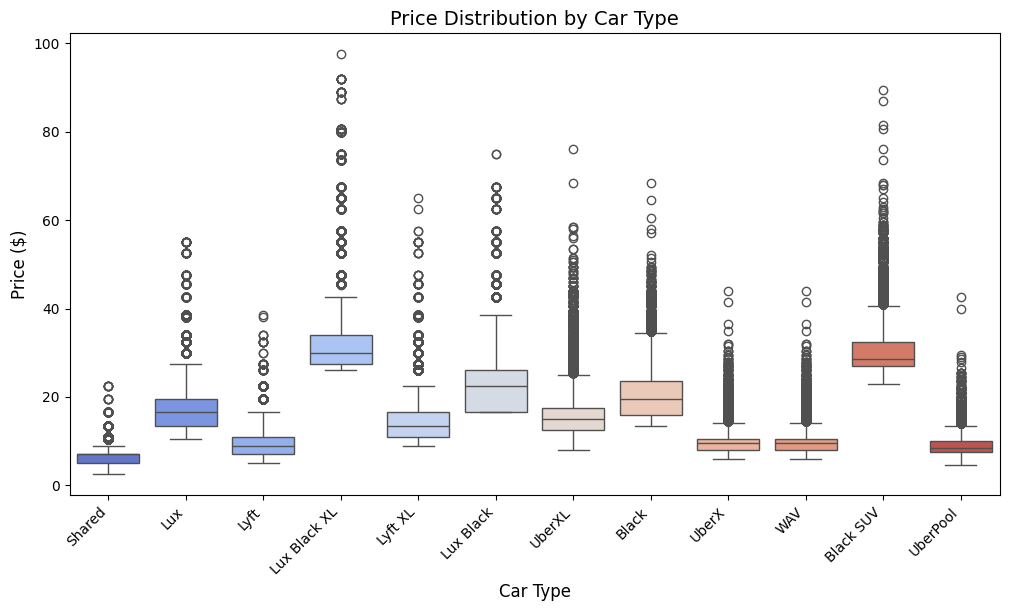

In [143]:
# Convert relevant columns to Pandas
car_price_pdf = spark_df.select("name", "price").toPandas()

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_price_pdf, x="name", y="price", palette="coolwarm")

# Rotate labels for better readability
plt.xticks(rotation=45, ha="right")
plt.xlabel("Car Type", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Price Distribution by Car Type", fontsize=14)
plt.show()


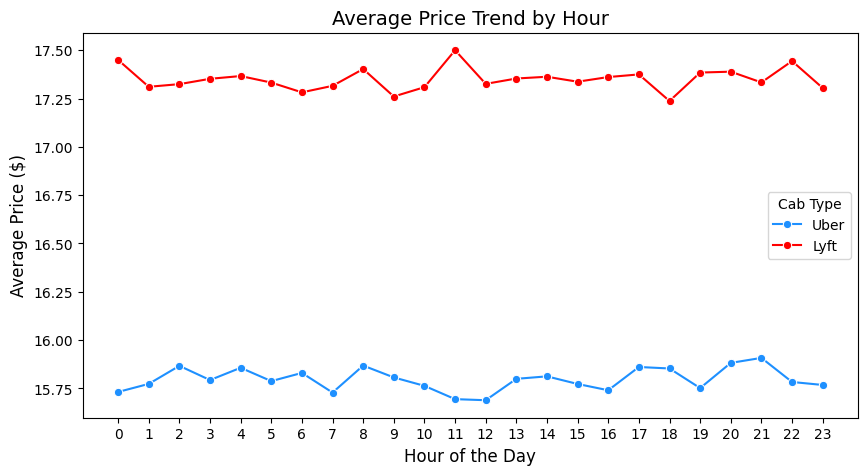

In [144]:
# Calculate average price per hour
avg_price_hour = spark_df.groupBy("hour", "cab_type").agg(avg("price").alias("avg_price")).toPandas()

# Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_price_hour, x="hour", y="avg_price", hue="cab_type", marker="o", palette={"Uber": "dodgerblue", "Lyft": "red"})

# Labels & Title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Price Trend by Hour", fontsize=14)
plt.xticks(range(0, 24))  # Ensure all 24 hours are displayed
plt.legend(title="Cab Type")
plt.show()


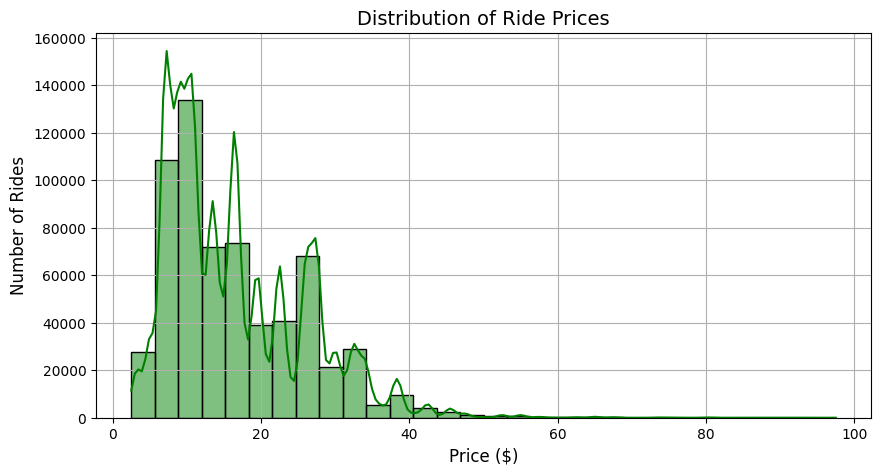

In [145]:
# Convert to Pandas for visualization
price_demand_pdf = spark_df.select("price").toPandas()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=price_demand_pdf, x="price", bins=30, kde=True, color="green")

# Labels & Title
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Ride Prices", fontsize=14)
plt.grid()
plt.show()


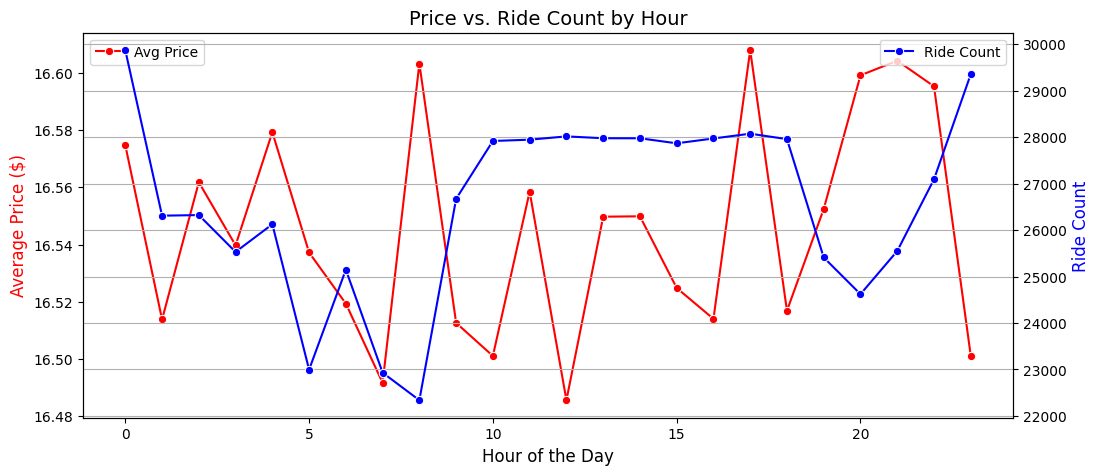

In [146]:
# Aggregate price & demand by hour
price_hour = spark_df.groupBy("hour").agg(avg("price").alias("avg_price"), count("*").alias("ride_count")).toPandas()

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Price Trend
ax1 = sns.lineplot(data=price_hour, x="hour", y="avg_price", color="red", marker="o", label="Avg Price")
ax1.set_ylabel("Average Price ($)", fontsize=12, color="red")

# Ride Demand
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=price_hour, x="hour", y="ride_count", color="blue", marker="o", label="Ride Count")
ax2.set_ylabel("Ride Count", fontsize=12, color="blue")

# Labels & Title
plt.title("Price vs. Ride Count by Hour", fontsize=14)
ax1.set_xlabel("Hour of the Day", fontsize=12)
plt.grid()
plt.show()


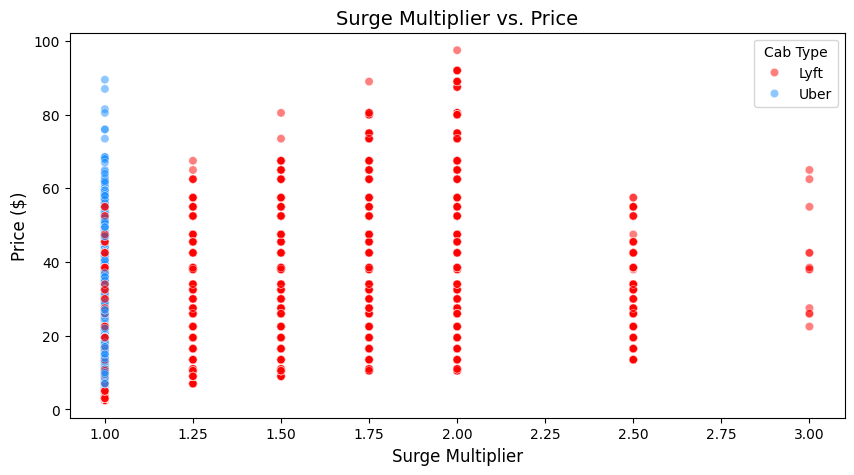

In [147]:
# Convert to Pandas for visualization
surge_price_pdf = spark_df.select("surge_multiplier", "price", "cab_type").toPandas()

# Plot scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=surge_price_pdf, x="surge_multiplier", y="price", hue="cab_type", alpha=0.5, palette={"Uber": "dodgerblue", "Lyft": "red"})

# Labels & Title
plt.xlabel("Surge Multiplier", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Surge Multiplier vs. Price", fontsize=14)
plt.legend(title="Cab Type")
plt.show()


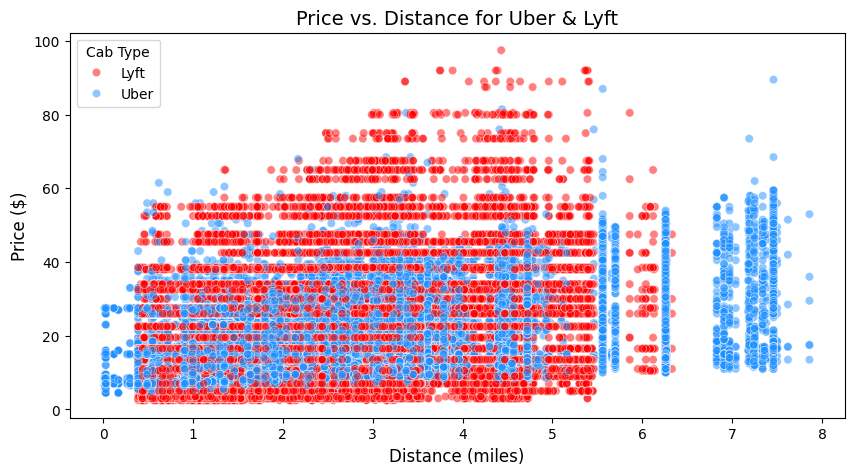

In [148]:
# Convert to Pandas for visualization
dist_price_pdf = spark_df.select("distance", "price", "cab_type").toPandas()

# Scatter plot: Distance vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=dist_price_pdf, x="distance", y="price", hue="cab_type", alpha=0.5, palette={"Uber": "dodgerblue", "Lyft": "red"})

# Labels & Title
plt.xlabel("Distance (miles)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Price vs. Distance for Uber & Lyft", fontsize=14)
plt.legend(title="Cab Type")
plt.show()


<ipython-input-149-84b2575a93ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expensive_cars, x="name", y="avg_price", palette="coolwarm")


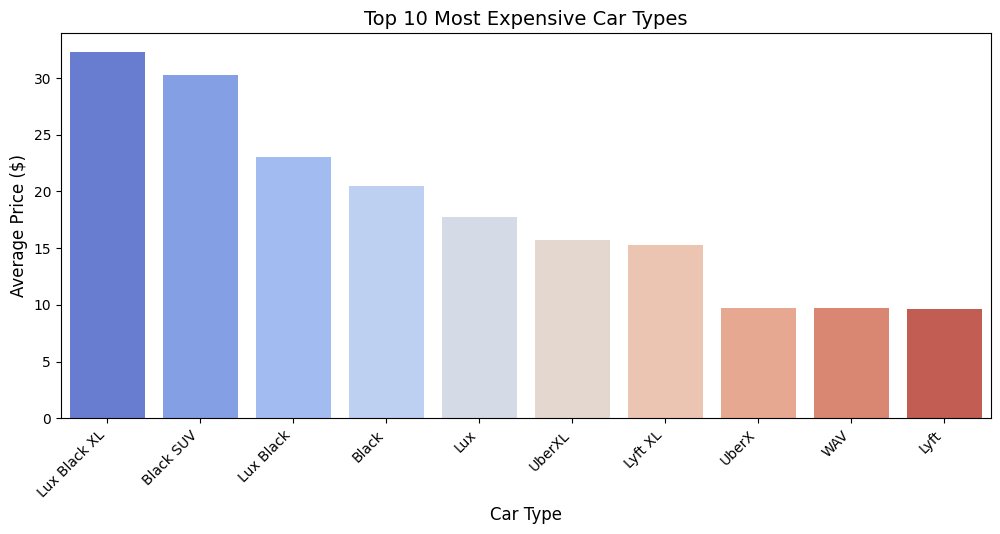

In [149]:
# Get average price by car model
expensive_cars = spark_df.groupBy("name").agg(avg("price").alias("avg_price")).orderBy(col("avg_price").desc()).limit(10).toPandas()

# Bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=expensive_cars, x="name", y="avg_price", palette="coolwarm")

# Labels & Title
plt.xticks(rotation=45, ha="right")
plt.xlabel("Car Type", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Top 10 Most Expensive Car Types", fontsize=14)
plt.show()


## 4.5 - Weather Impact Analysis:

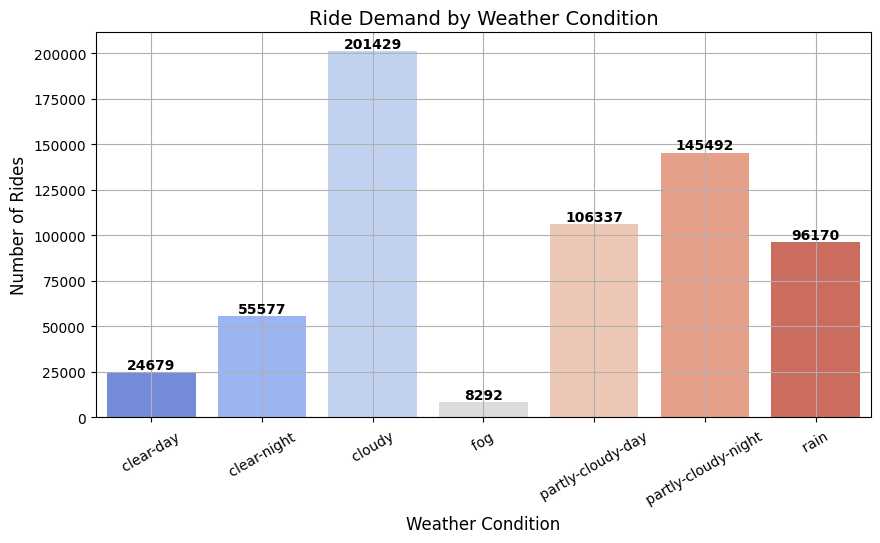

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count rides by weather condition
weather_demand = spark_df.groupBy("icon").agg(count("*").alias("ride_count"))

# Convert to Pandas and sort "icon" alphabetically
weather_demand_pdf = weather_demand.toPandas().sort_values("icon", ascending=True)

# Bar plot (Fix: Set hue=x to avoid warning)
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=weather_demand_pdf, x="icon", y="ride_count", hue="icon", dodge=False, palette="coolwarm", legend=False)

# Show data labels on bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Labels & Title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Ride Demand by Weather Condition", fontsize=14)
plt.xticks(rotation=30)
plt.grid()
plt.show()


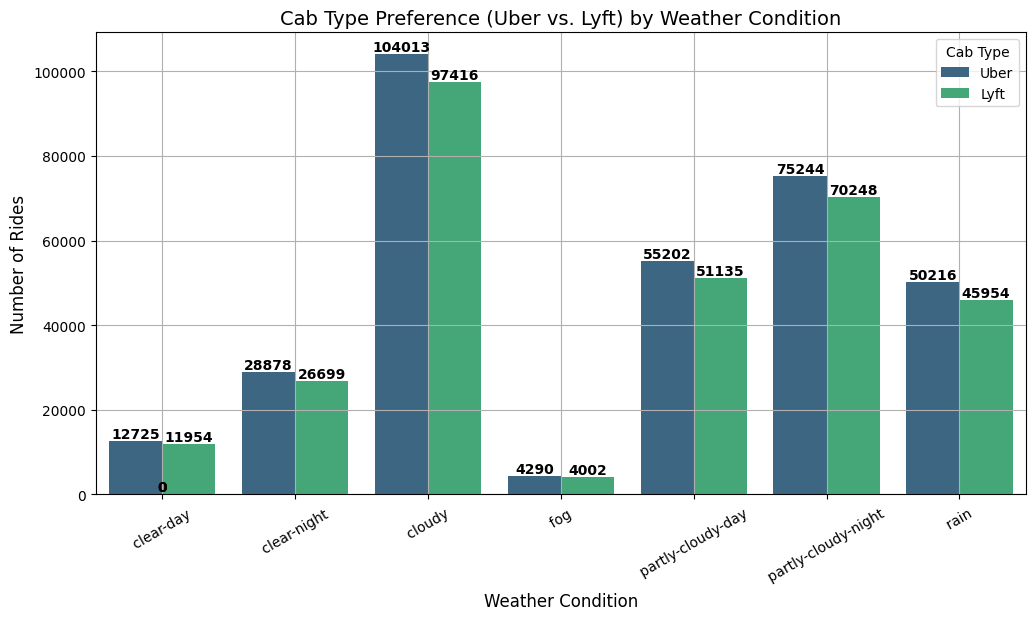

In [151]:
# Count rides by cab type and weather condition
cab_weather = spark_df.groupBy("icon", "cab_type").agg(count("*").alias("ride_count"))

# Convert to Pandas and sort "icon" alphabetically
cab_weather_pdf = cab_weather.toPandas().sort_values("icon", ascending=True)

# Bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cab_weather_pdf, x="icon", y="ride_count", hue="cab_type", palette="viridis")

# Show data labels on bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Labels & Title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Cab Type Preference (Uber vs. Lyft) by Weather Condition", fontsize=14)
plt.xticks(rotation=30)
plt.legend(title="Cab Type")
plt.grid()
plt.show()


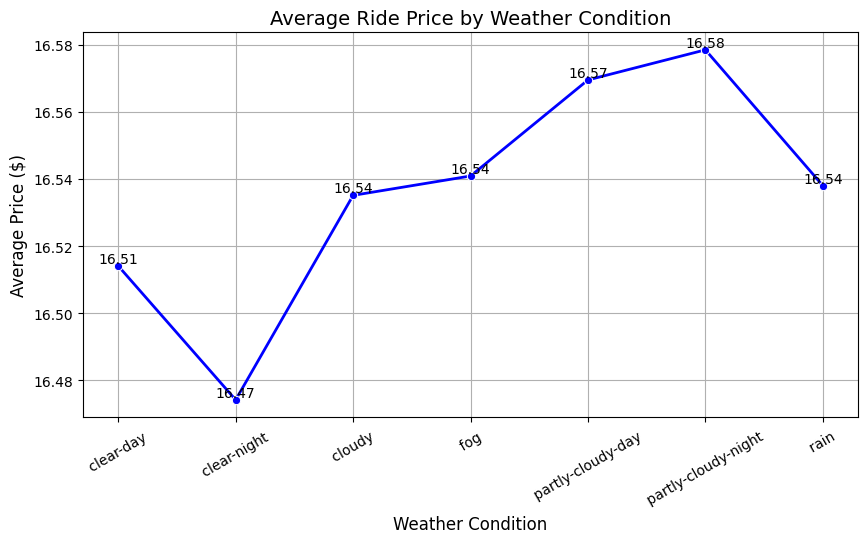

In [152]:
# Calculate average price per weather condition
avg_price_weather = spark_df.groupBy("icon").agg(avg("price").alias("avg_price"))

# Convert to Pandas and sort
avg_price_weather_pdf = avg_price_weather.toPandas().sort_values("icon", ascending=True)

# Line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_price_weather_pdf, x="icon", y="avg_price", marker="o", linewidth=2, color="blue")

# Show data labels
for i, value in enumerate(avg_price_weather_pdf["avg_price"]):
    plt.text(i, value, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

# Labels & Title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Ride Price by Weather Condition", fontsize=14)
plt.xticks(rotation=30)
plt.grid()
plt.show()


<ipython-input-153-54b611d8e03f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_price_pdf, x="icon", y="avg_price", palette="Reds")


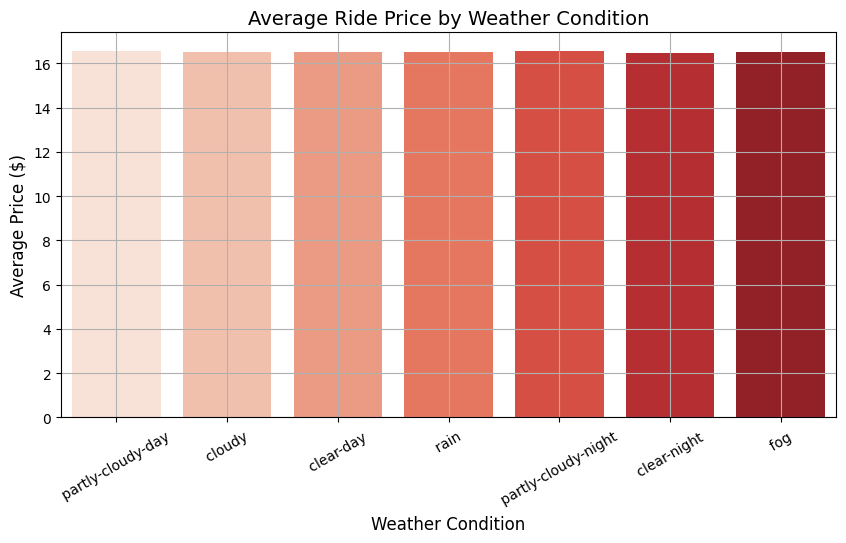

In [153]:
# Calculate average price for each weather condition
weather_price = spark_df.groupBy("icon").agg(avg("price").alias("avg_price"))

# Convert to Pandas
weather_price_pdf = weather_price.toPandas()

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=weather_price_pdf, x="icon", y="avg_price", palette="Reds")

# Labels & Title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Ride Price by Weather Condition", fontsize=14)
plt.xticks(rotation=30)
plt.grid()
plt.show()


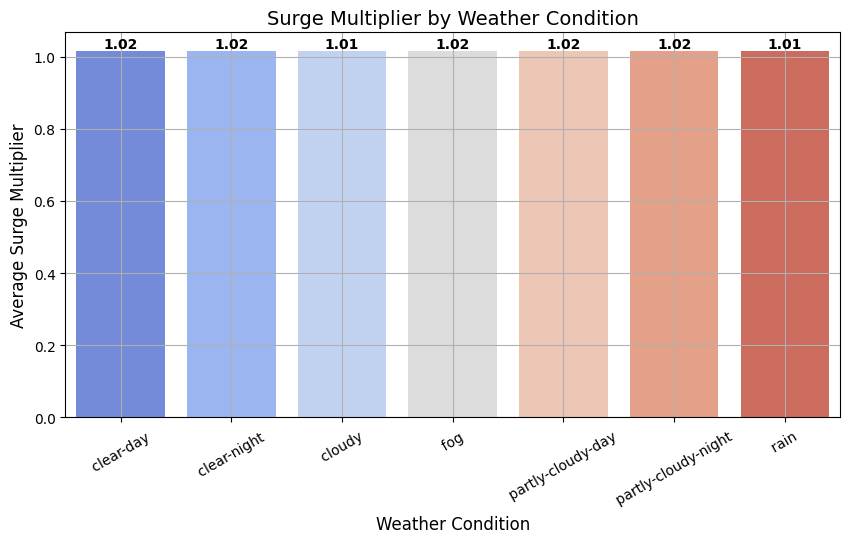

In [154]:
# Calculate average surge multiplier per weather condition
avg_surge_weather = spark_df.groupBy("icon").agg(avg("surge_multiplier").alias("avg_surge"))

# Convert to Pandas and sort
avg_surge_weather_pdf = avg_surge_weather.toPandas().sort_values("icon", ascending=True)

# Bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=avg_surge_weather_pdf, x="icon", y="avg_surge", hue="icon", dodge=False, palette="coolwarm", legend=False)

# Show data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Labels & Title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Surge Multiplier", fontsize=12)
plt.title("Surge Multiplier by Weather Condition", fontsize=14)
plt.xticks(rotation=30)
plt.grid()
plt.show()


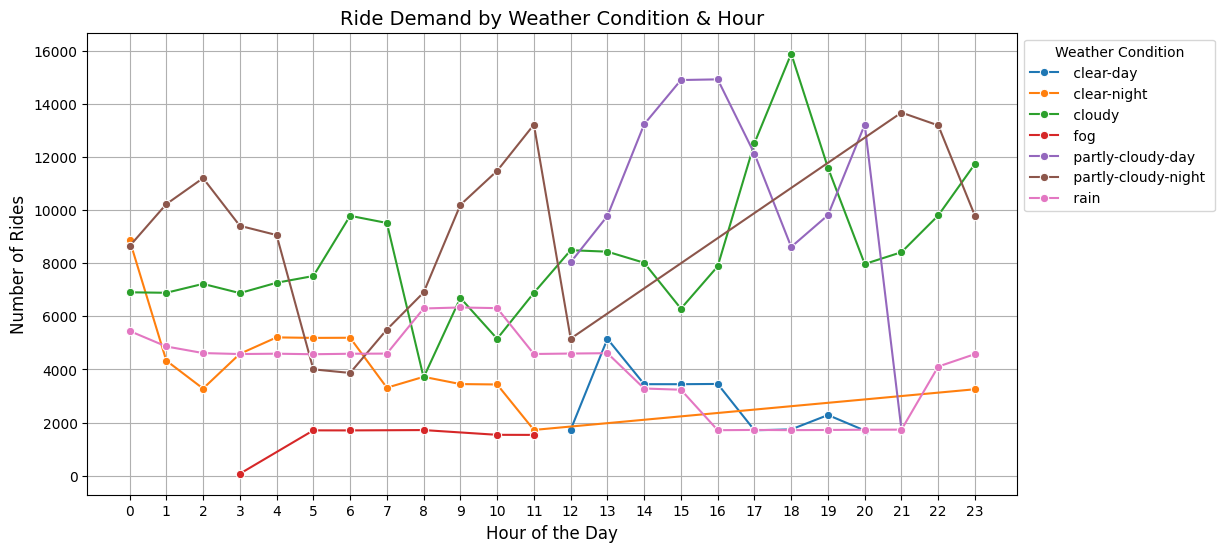

In [155]:
# Count rides per weather condition and hour
weather_hourly_demand = spark_df.groupBy("icon", "hour").agg(count("*").alias("ride_count"))

# Convert to Pandas
weather_hourly_demand_pdf = weather_hourly_demand.toPandas().sort_values(["icon", "hour"])

# Line plot with hue for each weather condition
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_hourly_demand_pdf, x="hour", y="ride_count", hue="icon", marker="o")

# Labels & Title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Ride Demand by Weather Condition & Hour", fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title="Weather Condition", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


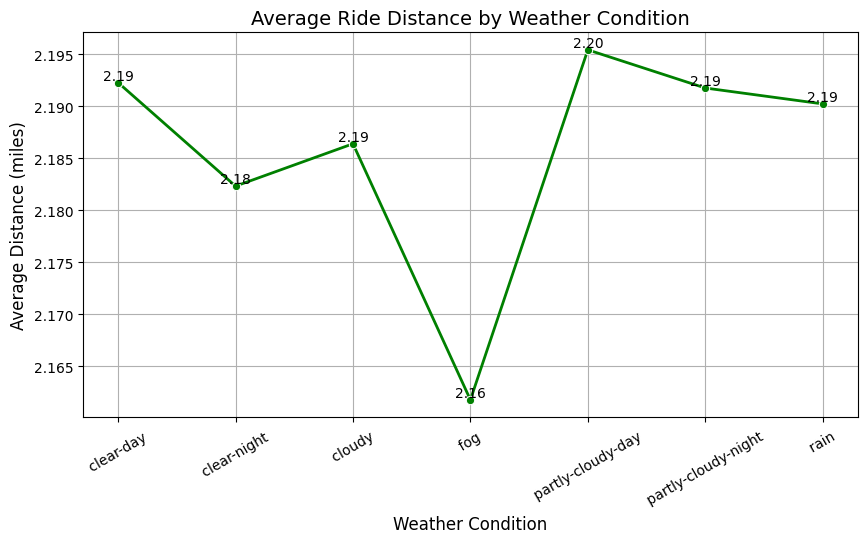

In [156]:
# Calculate average ride distance per weather condition
avg_distance_weather = spark_df.groupBy("icon").agg(avg("distance").alias("avg_distance"))

# Convert to Pandas and sort
avg_distance_weather_pdf = avg_distance_weather.toPandas().sort_values("icon", ascending=True)

# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_distance_weather_pdf, x="icon", y="avg_distance", marker="o", linewidth=2, color="green")

# Show data labels
for i, value in enumerate(avg_distance_weather_pdf["avg_distance"]):
    plt.text(i, value, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

# Labels & Title
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Distance (miles)", fontsize=12)
plt.title("Average Ride Distance by Weather Condition", fontsize=14)
plt.xticks(rotation=30)
plt.grid()
plt.show()


#5 - Data Preprocessing

##5.1 - Removing Unnecessary Features

In [157]:
spark_df.show(5)

+--------------------+--------------------+----+---+-----+-------------------+----------------+----------------+-------------+--------+------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|           timestamp|hour|day|month|           datetime|        timezone|          source|  destination|cab_type|  product_id|    

In [158]:
spark_df.printSchema()


root
 |-- id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)

In [159]:
# Drop unnecessary features in PySpark
columns_to_drop = ['id','timestamp','datetime','timezone','long_summary','temperatureHighTime',
                   'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
                   'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
                   'apparentTemperatureMinTime','apparentTemperatureMaxTime','product_id','short_summary']

spark_df = spark_df.drop(*columns_to_drop)

# Show updated schema
spark_df.printSchema()


root
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- windSpeed: double (nullable = true)
 |-- windGust: double (nullable = true)
 |-- windGustTime: integer (nullable = true)
 |-- visibility: double (nullable = true)
 |-- temperatureHigh: double (nullable = true)
 |-- temperatureLow: double (nullable = true)
 |-- apparentTemperatureHigh: 

##5.2 - Checking target feature "price" and remove outlier:

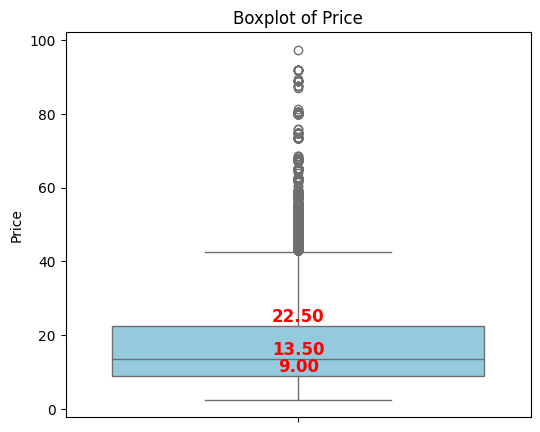

In [160]:
# Convert to Pandas DataFrame (only selecting the "price" column)
pandas_df = spark_df.select("price").toPandas()


# Calculate quartiles
q1 = pandas_df["price"].quantile(0.25)
median = pandas_df["price"].median()
q3 = pandas_df["price"].quantile(0.75)

# Plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=pandas_df["price"], color="skyblue")

# Annotate quartiles
plt.text(0, q1, f"{q1:.2f}", ha="center", va="bottom", fontsize=12, color="red", fontweight="bold")
plt.text(0, median, f"{median:.2f}", ha="center", va="bottom", fontsize=12, color="red", fontweight="bold")
plt.text(0, q3, f"{q3:.2f}", ha="center", va="bottom", fontsize=12, color="red", fontweight="bold")

# Add labels
plt.title("Boxplot of Price")
plt.ylabel("Price")

# Show plot
plt.show()


In [161]:
from pyspark.sql.functions import col

# Compute Q1, Q3, and IQR using Pandas
pandas_df = spark_df.select("price").toPandas()
q1 = pandas_df["price"].quantile(0.25)
q3 = pandas_df["price"].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Filter out outliers in Spark DataFrame
spark_df_no_outliers = spark_df.filter(
    (col("price") >= lower_bound) & (col("price") <= upper_bound)
)

# Show the number of rows before and after removing outliers
print(f"Original rows: {spark_df.count()}")
print(f"Rows after removing outliers: {spark_df_no_outliers.count()}")


Original rows: 637976
Rows after removing outliers: 632387


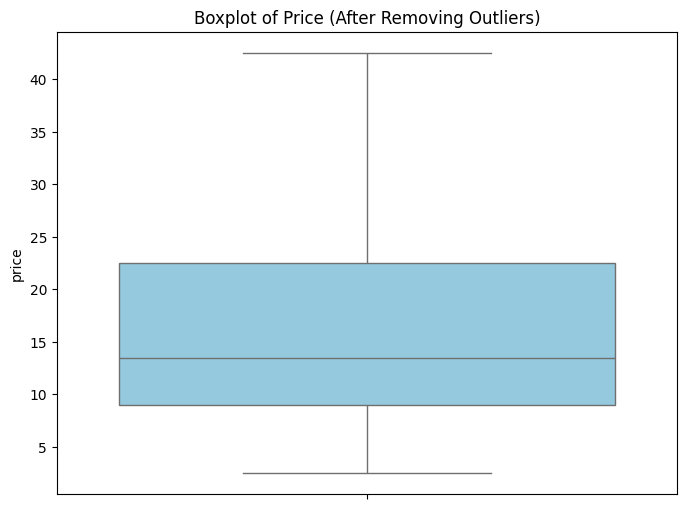

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert cleaned Spark DataFrame to Pandas for visualization
pandas_df_no_outliers = spark_df_no_outliers.select("price").toPandas()

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=pandas_df_no_outliers["price"], color="skyblue")

# Add title
plt.title("Boxplot of Price (After Removing Outliers)")

# Show the plot
plt.show()


In [163]:
spark_df_no_outliers.show(5)

+----+---+-----+----------------+-------------+--------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+--------------+-----------------------+----------------------+--------------------+--------+--------+-----------+----------+-------+-----+---------+------------------+--------------+--------------+----------------------+----------------------+
|hour|day|month|          source|  destination|cab_type|        name|price|distance|surge_multiplier|latitude|longitude|temperature|apparentTemperature|precipIntensity|precipProbability|humidity|windSpeed|windGust|windGustTime|visibility|temperatureHigh|temperatureLow|apparentTemperatureHigh|apparentTemperatureLow|                icon|dewPoint|pressure|windBearing|cloudCover|uvIndex|ozone|moonPhase|precipIntensityMax|temperatureMin|temperatureMax|apparentTemperatureMin|apparentTemperatureMax|
+---

In [164]:
spark_df_no_outliers.printSchema()

root
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- windSpeed: double (nullable = true)
 |-- windGust: double (nullable = true)
 |-- windGustTime: integer (nullable = true)
 |-- visibility: double (nullable = true)
 |-- temperatureHigh: double (nullable = true)
 |-- temperatureLow: double (nullable = true)
 |-- apparentTemperatureHigh: 

##5.3 - Checking correlation between features and target feature (price)

🔹 Interpretation:
- High correlation (above 0.75) → Features might be redundant (remove one).
- Low correlation with target variable (price) → May be unnecessary.
- Negative correlation → Might reveal interesting trends.


In [165]:
from pyspark.sql.functions import corr

# List of temperature-related numeric features
temp_features = [
    "temperature", "apparentTemperature", "temperatureHigh", "temperatureLow",
    "apparentTemperatureHigh", "apparentTemperatureLow", "temperatureMin",
    "temperatureMax", "apparentTemperatureMin", "apparentTemperatureMax"
]

# Compute correlation of each temperature feature with price
for feature in temp_features:
    correlation = spark_df_no_outliers.select(corr(feature, "price")).collect()[0][0]
    print(f"Correlation between {feature} and Price: {correlation:.4f}")


Correlation between temperature and Price: 0.0001
Correlation between apparentTemperature and Price: 0.0002
Correlation between temperatureHigh and Price: -0.0002
Correlation between temperatureLow and Price: 0.0003
Correlation between apparentTemperatureHigh and Price: 0.0001
Correlation between apparentTemperatureLow and Price: 0.0010
Correlation between temperatureMin and Price: -0.0007
Correlation between temperatureMax and Price: -0.0002
Correlation between apparentTemperatureMin and Price: -0.0007
Correlation between apparentTemperatureMax and Price: 0.0001


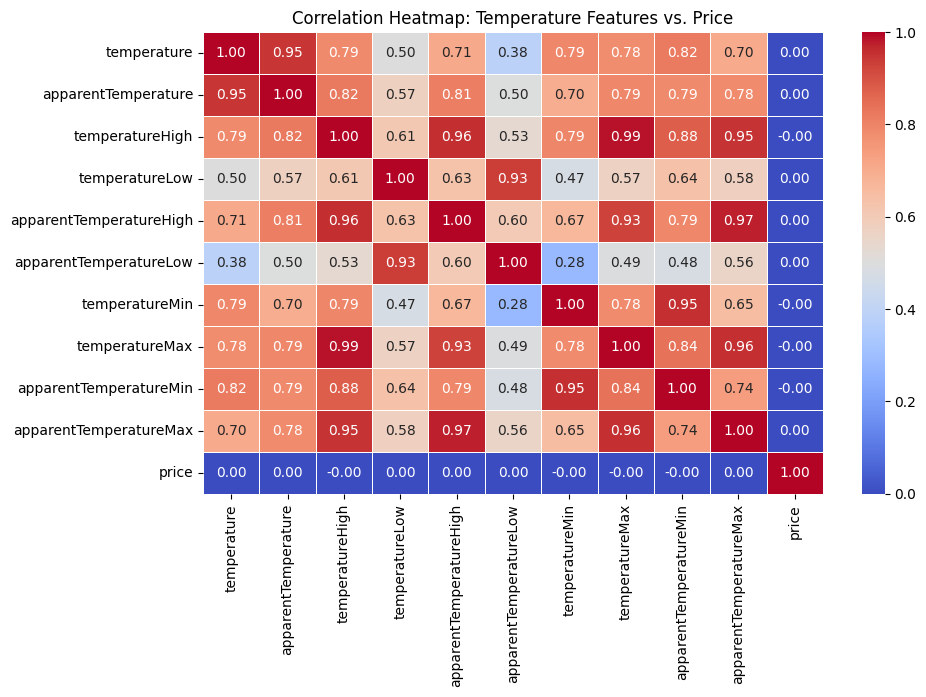

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert relevant columns to Pandas
temp_features = [
    "temperature", "apparentTemperature", "temperatureHigh", "temperatureLow",
    "apparentTemperatureHigh", "apparentTemperatureLow", "temperatureMin",
    "temperatureMax", "apparentTemperatureMin", "apparentTemperatureMax", "price"
]

# Convert Spark DataFrame to Pandas
pandas_df = spark_df_no_outliers.select(temp_features).toPandas()

# Compute correlation matrix
corr_matrix = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Temperature Features vs. Price")
plt.show()


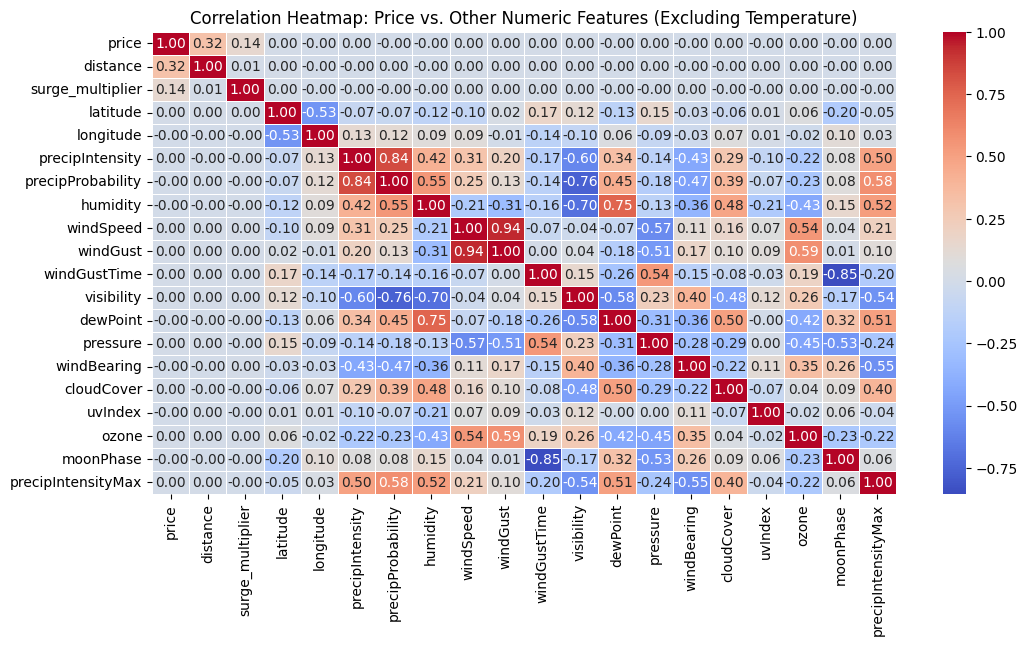

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric columns (excluding temperature-related features)
numeric_features = [
    "price", "distance", "surge_multiplier",
    "latitude", "longitude", "precipIntensity", "precipProbability",
    "humidity", "windSpeed", "windGust", "windGustTime", "visibility",
    "dewPoint", "pressure", "windBearing", "cloudCover", "uvIndex",
    "ozone", "moonPhase", "precipIntensityMax"
]

# Convert Spark DataFrame to Pandas
pandas_df = spark_df_no_outliers.select(numeric_features).toPandas()

# Compute correlation matrix
corr_matrix = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Price vs. Other Numeric Features (Excluding Temperature)")
plt.show()


In [168]:
# Define the selected columns
non_numeric_cols = ["source", "destination", "cab_type", "name", "icon"]
numeric_keep = ["distance", "surge_multiplier","price"]

selected_columns = non_numeric_cols + numeric_keep

# Create the new DataFrame
spark_df_filtered = spark_df_no_outliers.select(selected_columns)

# Show the first few rows
spark_df_filtered.show(5)


+----------------+-------------+--------+------------+--------------------+--------+----------------+-----+
|          source|  destination|cab_type|        name|                icon|distance|surge_multiplier|price|
+----------------+-------------+--------+------------+--------------------+--------+----------------+-----+
|Haymarket Square|North Station|    Lyft|      Shared| partly-cloudy-ni...|    0.44|             1.0|  5.0|
|Haymarket Square|North Station|    Lyft|         Lux|               rain |    0.44|             1.0| 11.0|
|Haymarket Square|North Station|    Lyft|        Lyft|        clear-night |    0.44|             1.0|  7.0|
|Haymarket Square|North Station|    Lyft|Lux Black XL|        clear-night |    0.44|             1.0| 26.0|
|Haymarket Square|North Station|    Lyft|     Lyft XL| partly-cloudy-ni...|    0.44|             1.0|  9.0|
+----------------+-------------+--------+------------+--------------------+--------+----------------+-----+
only showing top 5 rows



In [169]:
spark_df_filtered.printSchema()

root
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- icon: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- price: double (nullable = true)



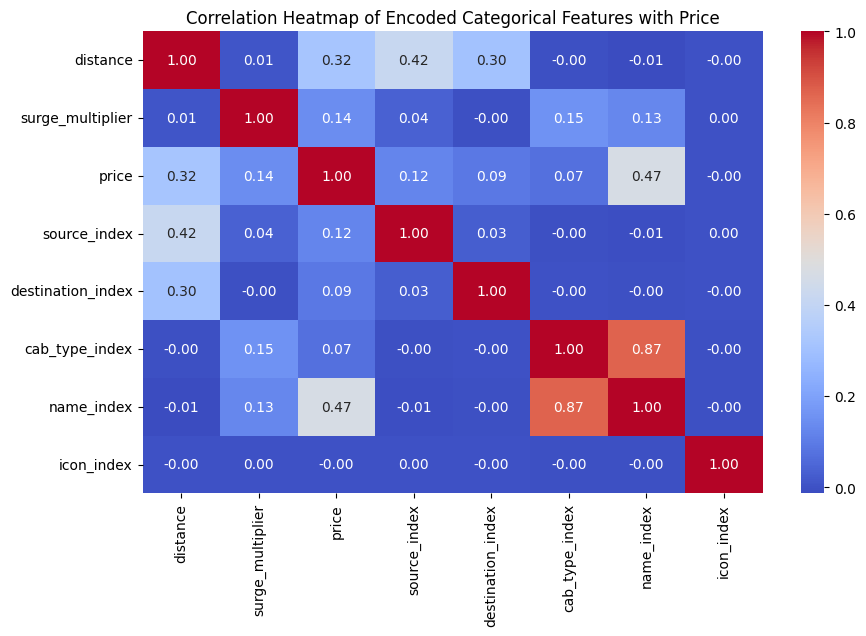

In [170]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: String Indexing
categorical_cols = ["source", "destination", "cab_type", "name", "icon"]
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]

# Step 2: One-Hot Encoding
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_ohe") for col in categorical_cols]

# Step 3: Assemble Features
assembler = VectorAssembler(
    inputCols=[col + "_ohe" for col in categorical_cols] + ["distance", "surge_multiplier"],
    outputCol="features"
)

# Step 4: Build Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
spark_df_transformed = pipeline.fit(spark_df_filtered).transform(spark_df_filtered)

# Step 5: Convert to Pandas DataFrame for Correlation Analysis
features_df = spark_df_transformed.select(["distance", "surge_multiplier", "price"] + [col + "_index" for col in categorical_cols]).toPandas()
correlation_matrix = features_df.corr()

# Step 6: Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Encoded Categorical Features with Price")
plt.show()


#6 - Regression Model With PySpark - Gradio Interface

In [171]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Step 1: Remove 'icon' feature
categorical_cols = ["destination","source","name"]  # 'icon' & 'cab_type' removed

# Step 2: String Indexing
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]

# Step 3: One-Hot Encoding
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_ohe") for col in categorical_cols]

# Step 4: Assemble Features
assembler = VectorAssembler(
    inputCols=[col + "_ohe" for col in categorical_cols] + ["distance", "surge_multiplier"],
    outputCol="features"
)

# Step 5: Build Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
spark_df_transformed = pipeline.fit(spark_df_filtered).transform(spark_df_filtered)

# Step 6: Train Linear Regression Model
lr = LinearRegression(featuresCol="features", labelCol="price", predictionCol="prediction")

# Step 7: Fit the model
lr_model = lr.fit(spark_df_transformed)

# Step 8: Show model coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

# Step 9: Make Predictions
predictions = lr_model.transform(spark_df_transformed)

# Show some predictions
predictions.select("price", "prediction").show(10)


Coefficients: [-0.006145884638416262,0.16037321244796374,0.1973472040370919,0.04222731938053599,0.19791428651891269,-0.04995885729199928,-0.08295031364839567,-0.3061626760235312,-0.27469185274139085,0.06043744785891146,0.13437774021282747,-0.07604267978274314,0.4544678139395561,0.22778536367080202,0.14065799392506406,-0.03950411326033651,-0.09754598564639476,-0.39482502319344853,0.3658256227285428,-0.29678665927900816,-0.03178701715381022,-0.10306298029104732,0.06358287610781653,-0.2970272676044054,-6.376458527417679,-6.376449013666295,-7.388526184647565,-0.4918904821078043,4.36334251501513,13.945353273720311,-7.041940662502883,-10.098876353653868,-1.3529431785893893,1.0995257332156316,6.253051931781943,14.925281944705,2.760975603621872,13.777619574848293]
Intercept: -3.686835842206331
+-----+------------------+
|price|        prediction|
+-----+------------------+
|  5.0| 1.568899748465347|
| 11.0|12.767301835334845|
|  7.0| 4.625835439616331|
| 26.0|26.593058046824215|
|  9.0|10.3148

In [172]:
from pyspark.ml.evaluation import RegressionEvaluator

# Define evaluators for different metrics
evaluator_rmse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

# Compute metrics
rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Root Mean Squared Error (RMSE): 2.2450
Mean Squared Error (MSE): 5.0399
Mean Absolute Error (MAE): 1.6538
R-squared (R²): 0.9345


In [173]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Step 1: Remove 'icon' feature
categorical_cols = ["name"]  # 'icon' & 'destination' & 'source' & 'cab_type' removed

# Step 2: String Indexing
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]

# Step 3: One-Hot Encoding
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_ohe") for col in categorical_cols]

# Step 4: Assemble Features
assembler = VectorAssembler(
    inputCols=[col + "_ohe" for col in categorical_cols] + ["distance", "surge_multiplier"],
    outputCol="features"
)

# Step 5: Build Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
spark_df_transformed = pipeline.fit(spark_df_filtered).transform(spark_df_filtered)

# Step 6: Train Linear Regression Model
lr = LinearRegression(featuresCol="features", labelCol="price", predictionCol="prediction")

# Step 7: Fit the model
lr_model = lr.fit(spark_df_transformed)

# Step 8: Show model coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

# Step 9: Make Predictions
predictions = lr_model.transform(spark_df_transformed)

# Show some predictions
predictions.select("price", "prediction").show(10)


Coefficients: [-6.376487198287182,-6.376465834471565,-7.388542140389396,-0.4920563568813179,4.362719241406169,13.938701392111371,-7.037980022369118,-10.099428804687324,-1.349256510613119,1.1027538266812371,6.2550000806018335,14.920613118789692,2.6734018026511746,13.658993832221592]
Intercept: -3.37643438418734
+-----+------------------+
|price|        prediction|
+-----+------------------+
|  5.0|1.3594274365134438|
| 11.0|12.561610067882006|
|  7.0| 4.420876218831651|
| 26.0| 26.37946935999046|
|  9.0| 10.10959973058765|
| 16.5|17.713856321802602|
| 10.5|11.820576884284401|
| 16.5|19.424833475499355|
|  3.0|3.0704045902101966|
| 27.5|28.090446513687212|
+-----+------------------+
only showing top 10 rows



In [174]:
from pyspark.ml.evaluation import RegressionEvaluator

# Define evaluators for different metrics
evaluator_rmse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

# Compute metrics
rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Root Mean Squared Error (RMSE): 2.2631
Mean Squared Error (MSE): 5.1216
Mean Absolute Error (MAE): 1.6773
R-squared (R²): 0.9334


In [175]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Define Features & Target
categorical_cols = ["destination","source", "name"]  # 'icon' & 'cab_type' removed
numeric_cols = ["distance", "surge_multiplier"]
target_col = "price"

# Drop existing 'name_index' column if it exists
if "name_index" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("name_index")

# Encode Categorical Features
indexer = StringIndexer(inputCol="name", outputCol="name_index", handleInvalid="keep")
encoder = OneHotEncoder(inputCol="name_index", outputCol="name_ohe")

# Assemble Features
feature_cols = ["name_ohe"] + numeric_cols
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Define Pipeline
pipeline = Pipeline(stages=[indexer, encoder, assembler])

# Transform Data
spark_df_transformed = pipeline.fit(spark_df_filtered).transform(spark_df_filtered)

# Split Data
train_data, test_data = spark_df_transformed.randomSplit([0.8, 0.2], seed=42)

# Define Models
lr = LinearRegression(featuresCol="features", labelCol=target_col)
dt = DecisionTreeRegressor(featuresCol="features", labelCol=target_col)
rf = RandomForestRegressor(featuresCol="features", labelCol=target_col)

# Define Evaluator
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")

# Define Hyperparameter Grids
lr_param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

dt_param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .build()

rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Define Cross-Validators
lr_cv = CrossValidator(estimator=lr,
                       estimatorParamMaps=lr_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

dt_cv = CrossValidator(estimator=dt,
                       estimatorParamMaps=dt_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

rf_cv = CrossValidator(estimator=rf,
                       estimatorParamMaps=rf_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

# Train Models
print("🔹 Training Linear Regression...")
lr_model = lr_cv.fit(train_data)

print("🔹 Training Decision Tree...")
dt_model = dt_cv.fit(train_data)

print("🔹 Training Random Forest...")
rf_model = rf_cv.fit(train_data)

# Get Best Model
best_lr = lr_model.bestModel
best_dt = dt_model.bestModel
best_rf = rf_model.bestModel

# Evaluate Best Models
def evaluate_model(model, name):
    predictions = model.transform(test_data)
    rmse = evaluator.evaluate(predictions)
    r2 = evaluator.setMetricName("r2").evaluate(predictions)
    print(f"✅ {name} - Best Scores: RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate_model(best_lr, "Linear Regression")
evaluate_model(best_dt, "Decision Tree")
evaluate_model(best_rf, "Random Forest")


🔹 Training Linear Regression...
🔹 Training Decision Tree...
🔹 Training Random Forest...
✅ Linear Regression - Best Scores: RMSE: 2.2589, R²: 0.9337
✅ Decision Tree - Best Scores: RMSE: 0.9611, R²: 0.9611
✅ Random Forest - Best Scores: RMSE: 0.9206, R²: 0.9206


In [88]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Define Features & Target
categorical_cols = ["destination", "source", "name"]  # 'icon' & 'cab_type' removed
numeric_cols = ["distance", "surge_multiplier"]
target_col = "price"

# Drop existing 'name_index' column if it exists
if "name_index" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("name_index")

# Apply StringIndexer - Convert categorical features into numerical indices
indexer = StringIndexer(inputCol="name", outputCol="name_index", handleInvalid="keep")
spark_df_filtered = indexer.fit(spark_df_filtered).transform(spark_df_filtered)  # Fit & Transform Here

# Confirm that 'name_index' exists
spark_df_filtered.printSchema()

# Apply OneHotEncoder - Convert indices into One-Hot encoded vectors
encoder = OneHotEncoder(inputCol="name_index", outputCol="name_ohe")
spark_df_filtered = encoder.fit(spark_df_filtered).transform(spark_df_filtered)  # Fit & Transform Here

# Confirm 'name_ohe' exists before proceeding
spark_df_filtered.printSchema()

# Assemble Features
feature_cols = ["name_ohe"] + numeric_cols
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_df_transformed = assembler.transform(spark_df_filtered)

# Split Data
train_data, test_data = spark_df_transformed.randomSplit([0.8, 0.2], seed=42)

# Define Models
lr = LinearRegression(featuresCol="features", labelCol=target_col)
dt = DecisionTreeRegressor(featuresCol="features", labelCol=target_col)
rf = RandomForestRegressor(featuresCol="features", labelCol=target_col)

# Define Evaluator
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")

# Define Hyperparameter Grids
lr_param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

dt_param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .build()

rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Define Cross-Validators
lr_cv = CrossValidator(estimator=lr,
                       estimatorParamMaps=lr_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

dt_cv = CrossValidator(estimator=dt,
                       estimatorParamMaps=dt_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

rf_cv = CrossValidator(estimator=rf,
                       estimatorParamMaps=rf_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

# Train Models
print("🔹 Training Linear Regression...")
lr_model = lr_cv.fit(train_data)

print("🔹 Training Decision Tree...")
dt_model = dt_cv.fit(train_data)

print("🔹 Training Random Forest...")
rf_model = rf_cv.fit(train_data)

# Get Best Model
best_lr = lr_model.bestModel
best_dt = dt_model.bestModel
best_rf = rf_model.bestModel

# Evaluate Best Models
def evaluate_model(model, name):
    predictions = model.transform(test_data)
    rmse = evaluator.evaluate(predictions)
    r2 = evaluator.setMetricName("r2").evaluate(predictions)
    print(f"✅ {name} - Best Scores: RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate_model(best_lr, "Linear Regression")
evaluate_model(best_dt, "Decision Tree")
evaluate_model(best_rf, "Random Forest")


root
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- icon: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- price: double (nullable = true)
 |-- name_index: double (nullable = false)

root
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- icon: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- price: double (nullable = true)
 |-- name_index: double (nullable = false)
 |-- name_ohe: vector (nullable = true)

🔹 Training Linear Regression...
🔹 Training Decision Tree...
🔹 Training Random Forest...
✅ Linear Regression - Best Scores: RMSE: 2.2589, R²: 0.9337
✅ Decision Tree - Best Scores: RMSE: 0.9611, R²: 0.9611
✅ Random Forest - Best

In [89]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import col

model_dir = "/content/drive/MyDrive/Aptech Project HK2/models/"

# Drop existing columns if they exist to avoid conflicts
if "name_index" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("name_index")

if "destination_index" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("destination_index")

if "source_index" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("source_index")

# Fit and save StringIndexer models
indexer_name = StringIndexer(inputCol="name", outputCol="name_index").fit(spark_df_filtered)
spark_df_filtered = indexer_name.transform(spark_df_filtered)
indexer_name.write().overwrite().save(model_dir + "name_indexer")

indexer_dest = StringIndexer(inputCol="destination", outputCol="destination_index").fit(spark_df_filtered)
spark_df_filtered = indexer_dest.transform(spark_df_filtered)
indexer_dest.write().overwrite().save(model_dir + "destination_indexer")

indexer_source = StringIndexer(inputCol="source", outputCol="source_index").fit(spark_df_filtered)
spark_df_filtered = indexer_source.transform(spark_df_filtered)
indexer_source.write().overwrite().save(model_dir + "source_indexer")

# Drop existing encoded columns if they exist
if "name_ohe" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("name_ohe")

if "destination_ohe" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("destination_ohe")

if "source_ohe" in spark_df_filtered.columns:
    spark_df_filtered = spark_df_filtered.drop("source_ohe")

# Fit and save OneHotEncoder models
encoder_name = OneHotEncoder(inputCols=["name_index"], outputCols=["name_ohe"]).fit(spark_df_filtered)
spark_df_filtered = encoder_name.transform(spark_df_filtered)
encoder_name.write().overwrite().save(model_dir + "name_encoder")

encoder_dest = OneHotEncoder(inputCols=["destination_index"], outputCols=["destination_ohe"]).fit(spark_df_filtered)
spark_df_filtered = encoder_dest.transform(spark_df_filtered)
encoder_dest.write().overwrite().save(model_dir + "destination_encoder")

encoder_source = OneHotEncoder(inputCols=["source_index"], outputCols=["source_ohe"]).fit(spark_df_filtered)
spark_df_filtered = encoder_source.transform(spark_df_filtered)
encoder_source.write().overwrite().save(model_dir + "source_encoder")

print("✅ Models saved successfully!")

from pyspark.ml.feature import StringIndexerModel, OneHotEncoderModel

# Load the properly saved models
indexer_name = StringIndexerModel.load(model_dir + "name_indexer")
indexer_dest = StringIndexerModel.load(model_dir + "destination_indexer")
indexer_source = StringIndexerModel.load(model_dir + "source_indexer")

encoder_name = OneHotEncoderModel.load(model_dir + "name_encoder")
encoder_dest = OneHotEncoderModel.load(model_dir + "destination_encoder")
encoder_source = OneHotEncoderModel.load(model_dir + "source_encoder")

print("✅ Models loaded successfully!")


✅ Models saved successfully!
✅ Models loaded successfully!


In [90]:
!pip install gradio

import gradio as gr
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexerModel, OneHotEncoderModel, VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressionModel

# Initialize Spark Session
spark = SparkSession.builder.appName("PricePrediction").getOrCreate()

# Define Google Drive Model Path
model_dir = "/content/drive/MyDrive/Aptech Project HK2/models/"

# Load Best Decision Tree Model
best_dt_model = DecisionTreeRegressionModel.load(model_dir + "best_decision_tree_model")

# Load Saved Preprocessing Models
indexer_name = StringIndexerModel.load(model_dir + "name_indexer")
indexer_dest = StringIndexerModel.load(model_dir + "destination_indexer")
indexer_source = StringIndexerModel.load(model_dir + "source_indexer")

encoder_name = OneHotEncoderModel.load(model_dir + "name_encoder")
encoder_dest = OneHotEncoderModel.load(model_dir + "destination_encoder")
encoder_source = OneHotEncoderModel.load(model_dir + "source_encoder")

# Define Feature Assembler
assembler = VectorAssembler(
    inputCols=["name_ohe", "destination_ohe", "source_ohe", "distance", "surge_multiplier"],
    outputCol="features"
)

def predict_price(name, destination, source, distance, surge_multiplier):
    """Function to predict price using the trained Decision Tree model."""

    # Convert input to Spark DataFrame
    input_data = spark.createDataFrame([(name, destination, source, float(distance), float(surge_multiplier))],
                                       ["name", "destination", "source", "distance", "surge_multiplier"])

    # Apply StringIndexer
    indexed_data = indexer_name.transform(input_data)
    indexed_data = indexer_dest.transform(indexed_data)
    indexed_data = indexer_source.transform(indexed_data)

    # Apply OneHotEncoder
    encoded_data = encoder_name.transform(indexed_data)
    encoded_data = encoder_dest.transform(encoded_data)
    encoded_data = encoder_source.transform(encoded_data)

    # Assemble Features
    final_data = assembler.transform(encoded_data)

    # Predict
    predictions = best_dt_model.transform(final_data)
    predicted_price = predictions.select("prediction").collect()[0][0]

    return f"Estimated Price: ${predicted_price:.2f}"

# Create Gradio Interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Textbox(label="Car Name"),
        gr.Textbox(label="Destination"),
        gr.Textbox(label="Source"),
        gr.Number(label="Distance (miles)"),
        gr.Number(label="Surge Multiplier")
    ],
    outputs=gr.Textbox(label="Predicted Price"),
    title="Ride-hailing Price Prediction",
    description="Enter ride details to predict the price 🚖"
)

# Launch Gradio App
iface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

#7 - Communicate the insight & results

- Peak hours do NOT exhibit significant fluctuations in ride demand and have NO notable impact on ride prices.

- Weather changes and temperature variations do NOT lead to substantial increases or decreases in ride prices.

- Greater travel distances are associated with higher total fares.

- 5 factors: pickup and drop-off locations, travel distance, car models’ name, and surge multiplier have demonstrated their influence on ride pricing.

- To estimate ride prices based on these influencing factors, the Gradio interface can be utilized (using the best model - Decision Tree Model).

---
#END HERE!
---